# Customer Segmentation and Engagement Analysis for IHCL(Indian Hotels Company Limited) brands dataset


##### The Indian Hotels Company Limited (IHCL) is one of Asia's largest and most iconic hospitality companies. Established in 1903 by Jamsetji Tata, the founder of the Tata Group, IHCL has a rich heritage and is known for its luxury hotel brand, Taj Hotels. With over a century of experience in the hospitality industry, IHCL operates a diverse portfolio of hotels, resorts, jungle safaris, and palaces, spanning various brands such as Taj, Vivanta, SeleQtions, and Ginger. The company is recognized for its commitment to providing exceptional service, luxurious experiences, and sustainable practices, making it a leader in the global hospitality market. IHCL's extensive network includes properties in India and internationally, offering guests a blend of traditional Indian hospitality and modern luxury.

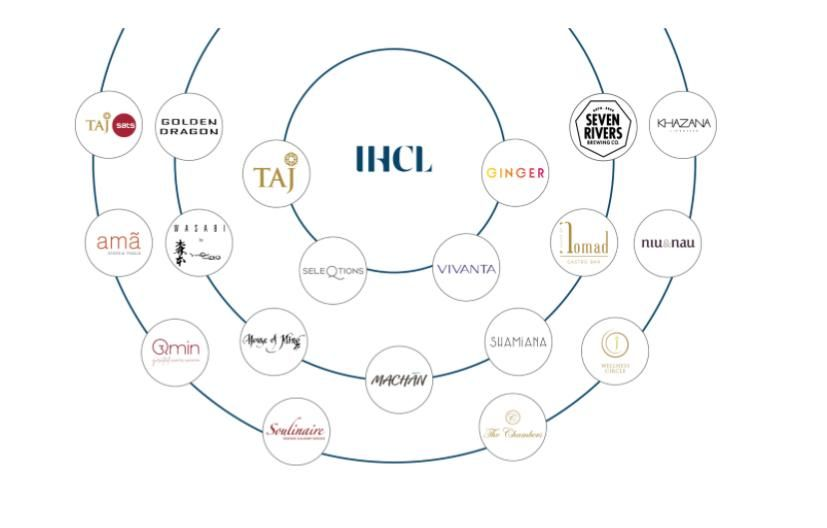

## Feature Selection from the dataset
###### The features in the dataset were selected using the SI-based feature selection model. Among the multiple features, the most relevant ones were chosen to improve the performance of the system by reducing complexity. The original and selected features are listed below

<table style="width:100%; ">
 <tr>
   <th>Feature Name</th>
   <th>Description </th>
   <th>Data type </th>
 </tr>
 <tr>
  <td>caption</td>
  <td>Description of the post</td>
  <td>Nominal</td>
 </tr>
 <tr>
   <td>ownerFullName</td>
   <td>Name of the owner</td>
   <td>Nominal</td>
 </tr>
 <tr>
   <td>ownerUsername</td>
   <td>Username in instagram of the owner</td>
   <td>Nominal</td>
 </tr>
 <tr>
   <td>commentsCount</td>
   <td>Number of comments on a post</td>
   <td>Numeric</td>
 </tr>
 <tr>
<td>firstComment</td>
<td>First comment in the post</td>
<td>Nominal</td>
 </tr>
 <tr>
<td>likesCount</td>
<td>Number of likes a post received</td>
<td>Numeric</td>
 </tr>
 <tr>
<td>timestamp</td>
<td>Time when a user last commented</td>
<td>Numeric</td>
 </tr>
 <tr>
<td>queryTag</td>
<td>Queries tag used in the data</td>
<td>Numeric</td>
 </tr>
 <tr>
<td>hashtags/0-30</td>
<td>Hashtags used in the posts</td>
<td>Nominal</td>
 </tr>
</table>

 ##### Feature Selected for  MSSO:
<table style="width:100%; ">
 <tr>
   <th>Feature Name</th>
   <th>Description </th>
   <th>Data type </th>
 </tr>
  <tr>
   <td>ownerFullName</td>
   <td>Name of the owner after doing EDA</td>
   <td>Nominal</td>
 </tr>
  <tr>
   <td>commentsCount</td>
   <td>Number of comments on a post</td>
   <td>Numeric</td>
 </tr>
 <tr>
<td>likesCount</td>
<td>Number of likes a post received</td>
<td>Numeric</td>
 </tr>
  <tr>
<td>timestamp</td>
<td>Time when a user last commented</td>
<td>Numeric</td>
 </tr>
 </table>

## Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
from pandas import to_datetime
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [9]:
df=pd.read_excel('IHCL_Source_Data.xlsx')
df.head(10)

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
0,0,IHCL Expands Presence in Kochi with a New Viva...,Tourism India,tourismindiamag,0,NaN,1,2023-12-03T09:32:22.000Z,NaN,ihcl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Mixing more than the traditional apricots, fig...","Vivanta Bhubaneswar, DN Square",vivanta_bhubaneswar,0,NaN,28,2023-12-04T07:24:43.000Z,NaN,VivantaBhubaneswar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A new chapter✨️\n\n#hospitality #hotelindustry...,Vineet Borkar,_vineetborkar07_,9,NaN,86,2023-12-02T20:31:28.000Z,NaN,hospitality,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Decadent mornings!\nStart your day with a touc...,"Taj Amer, Jaipur",taj_amerjaipur,0,NaN,61,2023-12-03T04:01:13.000Z,NaN,TajAmerJaipur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Your love story deserves a setting as extraord...,"Taj City Centre New Town, Kolkata",tajcitycentrenewtown,0,NaN,34,2023-12-03T05:30:16.000Z,NaN,TajCityCentreNewTown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"On chilly nights, find your cosy nook and curl...","Taj Corbett Resort & Spa, Uttarakhand",tajcorbettresort,0,NaN,35,2023-12-03T12:55:47.000Z,NaN,TajCorbett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Savour the essence of culinary mastery at Para...,Taj Yeshwantpur Bengaluru,tajyeshwantpur,0,NaN,25,2023-12-02T12:35:17.000Z,NaN,TajYeshwantpur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Kempegowda International Airport Bengaluru\nTa...,mdshakil4937@gmail.com,mdshakil4937_,1,Cheak my story,10,2023-12-03T02:39:50.000Z,NaN,IHCL,...,love,lovequotes,likesforlike,lifestyle,loveyourself,like,live,Taj,NaN,NaN
8,8,Sundays are brunch days. \nWith our talented c...,"The Crown, Bhubaneswar - IHCL SeleQtions",thecrownbhubaneswar,0,NaN,45,2023-12-01T14:30:13.000Z,NaN,TheCrownBhubaneswar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Witness the unrivalled majesty of the wild. Ca...,"Taj Corbett Resort & Spa, Uttarakhand",tajcorbettresort,0,NaN,71,2023-12-02T14:21:01.000Z,NaN,TajCorbett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

###### data cleaning is very very important fro this dataset as it is scraped from instagram so we have to securely choose freatures and clean the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          7823 non-null   int64  
 1   caption        7822 non-null   object 
 2   ownerFullName  7755 non-null   object 
 3   ownerUsername  7823 non-null   object 
 4   commentsCount  7823 non-null   int64  
 5   firstComment   2297 non-null   object 
 6   likesCount     7823 non-null   int64  
 7   timestamp      7823 non-null   object 
 8   queryTag       0 non-null      float64
 9   hashtags/0     7791 non-null   object 
 10  hashtags/1     7656 non-null   object 
 11  hashtags/2     7507 non-null   object 
 12  hashtags/3     7049 non-null   object 
 13  hashtags/4     6699 non-null   object 
 14  hashtags/5     6332 non-null   object 
 15  hashtags/6     5881 non-null   object 
 16  hashtags/7     5286 non-null   object 
 17  hashtags/8     4731 non-null   object 
 18  hashtags

In [11]:
df.isnull().sum()

,0
Index,0
caption,1
ownerFullName,68
ownerUsername,0
commentsCount,0
firstComment,5526
likesCount,0
timestamp,0
queryTag,7823
hashtags/0,32


In [12]:
## the row in which captio has 1 null
df[df['caption'].isnull()]

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
1958,1958,NaN,"""PATISSERIE TRAIT""",patisserie_trait,1,#patisserie #instacake #qmin #foodblogger #bak...,14,2023-03-23T07:05:52.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## drop this row where caption has 1 null value
df=df.dropna(subset=['caption'])

In [14]:
df.isnull().sum()

,0
Index,0
caption,0
ownerFullName,68
ownerUsername,0
commentsCount,0
firstComment,5526
likesCount,0
timestamp,0
queryTag,7822
hashtags/0,31


In [15]:
## give me the rows where there is missing ownerFullName
df[df['ownerFullName'].isnull()]

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
247,247,"We are #CelebratingOurBond with you, with our ...",NaN,tajlandsend,0,NaN,80,2023-11-10T16:58:15.000Z,NaN,CelebratingOurBond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,532,Join in as we celebrate our bond with you. Arr...,NaN,tajlandsend,0,NaN,158,2023-10-28T06:05:19.000Z,NaN,TajHotels,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,666,️\n.\n.\n.\n.\n.\n.\n#tajlakefrontbhopal #ihcl...,NaN,rebellious_boy945,1,NaN,-1,2023-10-08T16:57:20.000Z,NaN,tajlakefrontbhopal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,843,A lesser known temple of Hoysala Architecture ...,NaN,dialogwithlife,0,NaN,6,2023-09-22T14:25:06.000Z,NaN,aroundbangalore,...,slowtravel,travelphotography,weekendgetaway,hoysala,hoysalaarchitecture,belavadi,veeranarayanatemple,veeranarayanatemplebelvadi,wtdkarnatakacompetition,NaN
887,887,"We had a perfect 2 night , 3 day stay at this ...",NaN,dialogwithlife,0,NaN,8,2023-09-16T15:47:16.000Z,NaN,Tajhotels,...,lateevening,momandme,familytime,postcardplaces,slowtravel,travelphotography,thingsthathapeninvacation,weekendgetaway,zindaginamilegidobara,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,7505,Beat the heat!!\nLemonpunch #sea #heat #malays...,NaN,storiesfrommypocket,0,NaN,33,2015-04-29T06:31:19.000Z,NaN,sea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7539,7539,"The secret garden afternoon tea,a magical expe...",NaN,x_x_shahana_x_x,0,NaN,10,2023-09-22T23:07:01.000Z,NaN,sceretgarden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7551,7551,Pre Diwali afternoon chai time @taj51bg #konat...,NaN,dmodasia,0,NaN,4,2022-10-23T20:25:56.000Z,NaN,konateatime,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,7557,#thequeenandhercorgis #corgi #tajhotellondon ...,NaN,traveller_neegee,0,NaN,4,2022-07-07T21:25:12.000Z,NaN,thequeenandhercorgis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          7822 non-null   int64  
 1   caption        7822 non-null   object 
 2   ownerFullName  7754 non-null   object 
 3   ownerUsername  7822 non-null   object 
 4   commentsCount  7822 non-null   int64  
 5   firstComment   2296 non-null   object 
 6   likesCount     7822 non-null   int64  
 7   timestamp      7822 non-null   object 
 8   queryTag       0 non-null      float64
 9   hashtags/0     7791 non-null   object 
 10  hashtags/1     7656 non-null   object 
 11  hashtags/2     7507 non-null   object 
 12  hashtags/3     7049 non-null   object 
 13  hashtags/4     6699 non-null   object 
 14  hashtags/5     6332 non-null   object 
 15  hashtags/6     5881 non-null   object 
 16  hashtags/7     5286 non-null   object 
 17  hashtags/8     4731 non-null   object 
 18  hashtags/9   

In [17]:
df.isnull().sum()

,0
Index,0
caption,0
ownerFullName,68
ownerUsername,0
commentsCount,0
firstComment,5526
likesCount,0
timestamp,0
queryTag,7822
hashtags/0,31


In [18]:
## check the hashtags/0 where ownerFullname is NAN
df[df['ownerFullName'].isnull()]['hashtags/0']

,hashtags/0
247,CelebratingOurBond
532,TajHotels
666,tajlakefrontbhopal
843,aroundbangalore
887,Tajhotels
...,...
7505,sea
7539,sceretgarden
7551,konateatime
7557,thequeenandhercorgis


In [19]:
contains_jwellnessgroup = df.apply(lambda row: row.astype(str).str.contains('JWellnessCircle').any(), axis=1)

# Filter the DataFrame
filtered_df = df[contains_jwellnessgroup]

# Display the filtered DataFrame
print(filtered_df)

      Index                                            caption  \
34       34  Indulge in the art of pampering at J Wellness ...   
43       43  Indulge in wellness, life’s true luxury.\n\nTr...   
57       57  Enter a realm where every moment is a step clo...   
65       65  Step into a realm of renewal, where the ancien...   
129     129  Feel the skilled strokes of our therapists wor...   
175     175  Discover the perfect harmony of solitude and i...   
202     202  In an oasis of peace, witness the transformati...   
207     207  As the waterfall's melody serenades your sense...   
339     339  Be enchanted by the calming aromas and ambienc...   
378     378  Picture yourself in the lap of luxury as you e...   
399     399  Give yourself a little self-care; you deserve ...   
419     419  Experience a blissful night's sleep with Trupt...   
503     503  Where the harmonising ambience of soothing jad...   
550     550  Centuries of wellness wisdom, and the skilled ...   
555     55

In [20]:
# Assuming filtered_df is a filtered version of another DataFrame df
filtered_df.loc[:, 'ownerFullName'] = 'JWellnessCircle'


In [21]:
filtered_df

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
34,34,Indulge in the art of pampering at J Wellness ...,JWellnessCircle,tajcitycentrenewtown,0,NaN,34,2023-12-01T05:48:59.000Z,NaN,TajCityCentreNewTown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,"Indulge in wellness, life’s true luxury.\n\nTr...",JWellnessCircle,tajbangalore,0,NaN,16,2023-12-02T14:40:09.000Z,NaN,JWellnessCircle.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,57,Enter a realm where every moment is a step clo...,JWellnessCircle,tajyeshwantpur,0,NaN,12,2023-11-30T12:35:09.000Z,NaN,TajYeshwantpur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,65,"Step into a realm of renewal, where the ancien...",JWellnessCircle,tajgreencoveresort,0,NaN,27,2023-11-28T12:36:00.000Z,NaN,TajGreenCove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,129,Feel the skilled strokes of our therapists wor...,JWellnessCircle,tajmgroad,0,NaN,55,2023-11-21T12:52:17.000Z,NaN,TajMGRoad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,175,Discover the perfect harmony of solitude and i...,JWellnessCircle,tajcorbettresort,1,Lovely,60,2023-11-16T13:30:12.000Z,NaN,"JWellnessCircle,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,202,"In an oasis of peace, witness the transformati...",JWellnessCircle,tajwayanadkerala,0,NaN,21,2023-11-13T04:30:19.000Z,NaN,TajWayanadResortAndSpa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,207,As the waterfall's melody serenades your sense...,JWellnessCircle,tajgreencoveresort,0,NaN,39,2023-11-16T13:12:45.000Z,NaN,TajGreenCove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,339,Be enchanted by the calming aromas and ambienc...,JWellnessCircle,taj_amerjaipur,0,NaN,52,2023-11-03T13:18:54.000Z,NaN,TajAmerJaipur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,378,Picture yourself in the lap of luxury as you e...,JWellnessCircle,tajbangalore,0,NaN,24,2023-10-30T13:30:25.000Z,NaN,TajBangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.update(filtered_df)

In [23]:
''' check the ownerFullname and also hashtags/0 with the keywords and fill the keywords in the ownerFullName after
matching all the hashtags/0 and ownerFullName keywords = {
    'taj': 'Taj', 'Taj': 'Taj', 'Tajstat': 'TajStat', 'tajstat': 'TajStat',
    'Ginger': 'Ginger', 'ginger': 'Ginger', 'Vivanta': 'Vivanta', 'IHCL': 'IHCL', 'ihcl': 'IHCL',
    'SeleQtions': 'SeleQtions', 'seleqtion': 'SeleQtions', 'Wasabi': 'Wasabi', 'wasabi': 'Wasabi',
    'Machan': 'Machan', 'machan': 'Machan', 'Rivers': 'Rivers', 'rivers': 'Rivers', 'houseofming': 'HouseOfMing',
    'Shamiana': 'Shamiana', 'shamiana': 'Shamiana', 'Nomad': 'Nomad', 'nomad': 'Nomad',
    'Qmin': 'Qmin', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire', 'TheChambers': 'TheChambers',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'JWellnessCircle': 'JWellnessCircle',
    'khazana': 'Khazana', 'Khazana': 'Khazana'
}'''

keywords = {
    'taj': 'Taj', 'Taj': 'Taj', 'Tajstat': 'TajStat', 'tajstat': 'TajStat',
    'Ginger': 'Ginger', 'ginger': 'Ginger', 'Vivanta': 'Vivanta', 'IHCL': 'IHCL', 'ihcl': 'IHCL',
    'SeleQtions': 'SeleQtions', 'seleqtion': 'SeleQtions', 'Wasabi': 'Wasabi', 'wasabi': 'Wasabi',
    'Machan': 'Machan', 'machan': 'Machan', 'houseofming': 'HouseOfMing',
    'Shamiana': 'Shamiana', 'shamiana': 'Shamiana', 'Nomad': 'Nomad', 'nomad': 'Nomad',
    'Qmin': 'Qmin', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire', 'TheChambers': 'TheChambers',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'JWellnessCircle': 'JWellnessCircle',
    'khazana': 'Khazana', 'Khazana': 'Khazana'
}

# Function to update ownerFullName based on keywords in ownerFullName and hashtags/0
def update_owner_fullname(row):
    for key, value in keywords.items():
        if key.lower() in str(row['ownerFullName']).lower() or key.lower() in str(row['hashtags/0']).lower():
            row['ownerFullName'] = value
            break
    return row

# Apply the function to each row in the DataFrame
df = df.apply(update_owner_fullname, axis=1)

df

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
0,0,IHCL Expands Presence in Kochi with a New Viva...,IHCL,tourismindiamag,0,NaN,1,2023-12-03T09:32:22.000Z,NaN,ihcl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Mixing more than the traditional apricots, fig...",Vivanta,vivanta_bhubaneswar,0,NaN,28,2023-12-04T07:24:43.000Z,NaN,VivantaBhubaneswar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A new chapter✨️\n\n#hospitality #hotelindustry...,Vineet Borkar,_vineetborkar07_,9,NaN,86,2023-12-02T20:31:28.000Z,NaN,hospitality,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Decadent mornings!\nStart your day with a touc...,Taj,taj_amerjaipur,0,NaN,61,2023-12-03T04:01:13.000Z,NaN,TajAmerJaipur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Your love story deserves a setting as extraord...,Taj,tajcitycentrenewtown,0,NaN,34,2023-12-03T05:30:16.000Z,NaN,TajCityCentreNewTown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,7818,Outside the Taj Hotel Buckingham Palace Gate L...,Taj,tallykoren,0,NaN,13,2015-09-16T09:40:09.000Z,NaN,tajhotels,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7819,7819,Highlights of 2017 #my first fashion film wit...,NaN,arfabeauty,3,Ey! Nice feed. O loved it. Have a look mine! I...,37,2017-12-30T20:05:20.000Z,NaN,my,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7820,7820,#london #julilondon #juleferie #christmas #ch...,Sunniva Husby-Lund,sunnhl,6,Aww cool,54,2018-12-29T18:41:52.000Z,NaN,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7821,7821,@tbrfloraldesign is in the Easter mood with ou...,tbrfloraldesign,tbrfloraldesign,2,NaN,40,2016-03-16T06:21:20.000Z,NaN,livinggarden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df['ownerFullName'] = df['ownerFullName'].str.lower()
df

,Index,caption,ownerFullName,ownerUsername,commentsCount,firstComment,likesCount,timestamp,queryTag,hashtags/0,...,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,hashtags/30
0,0,IHCL Expands Presence in Kochi with a New Viva...,ihcl,tourismindiamag,0,NaN,1,2023-12-03T09:32:22.000Z,NaN,ihcl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Mixing more than the traditional apricots, fig...",vivanta,vivanta_bhubaneswar,0,NaN,28,2023-12-04T07:24:43.000Z,NaN,VivantaBhubaneswar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A new chapter✨️\n\n#hospitality #hotelindustry...,vineet borkar,_vineetborkar07_,9,NaN,86,2023-12-02T20:31:28.000Z,NaN,hospitality,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Decadent mornings!\nStart your day with a touc...,taj,taj_amerjaipur,0,NaN,61,2023-12-03T04:01:13.000Z,NaN,TajAmerJaipur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Your love story deserves a setting as extraord...,taj,tajcitycentrenewtown,0,NaN,34,2023-12-03T05:30:16.000Z,NaN,TajCityCentreNewTown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,7818,Outside the Taj Hotel Buckingham Palace Gate L...,taj,tallykoren,0,NaN,13,2015-09-16T09:40:09.000Z,NaN,tajhotels,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7819,7819,Highlights of 2017 #my first fashion film wit...,NaN,arfabeauty,3,Ey! Nice feed. O loved it. Have a look mine! I...,37,2017-12-30T20:05:20.000Z,NaN,my,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7820,7820,#london #julilondon #juleferie #christmas #ch...,sunniva husby-lund,sunnhl,6,Aww cool,54,2018-12-29T18:41:52.000Z,NaN,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7821,7821,@tbrfloraldesign is in the Easter mood with ou...,tbrfloraldesign,tbrfloraldesign,2,NaN,40,2016-03-16T06:21:20.000Z,NaN,livinggarden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Keywords dictionary
keywords = {
    'taj': 'Taj', 'ginger': 'Ginger', 'vivanta': 'Vivanta', 'ihcl': 'IHCL',
    'seleqtions': 'SeleQtions', 'wasabi': 'Wasabi', 'machan': 'Machan', 'houseofming': 'HouseOfMing',
    'shamiana': 'Shamiana', 'nomad': 'Nomad', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'jwellnesscircle': 'JWellnessCircle', 'khazana': 'Khazana'
}

# Convert keywords to lowercase
keywords_lower = {k.lower(): v for k, v in keywords.items()}

# Function to check if ownerFullName matches any keyword, handling potential float values
def has_keyword_match(owner_fullname, keywords_lower):
    # Handle potential float values by converting to string if necessary
    if isinstance(owner_fullname, float):
        owner_fullname = str(owner_fullname)
    for key in keywords_lower.keys():
        if key in owner_fullname.lower():
            return True
    return False

# Create a mask for rows with no match in ownerFullName
no_match_mask = ~df['ownerFullName'].apply(lambda x: has_keyword_match(x, keywords_lower))

# Filter rows with no match
rows_with_no_match = df[no_match_mask]

# Print the rows with no match
print(rows_with_no_match)

      Index                                            caption  \
2         2  A new chapter✨️\n\n#hospitality #hotelindustry...   
13       13  Whisking up a storm at Blue Diamond Pune's cak...   
17       17  SeleQtions Tirupati - an IHCL 112 keys, luxury...   
18       18  The visual representation of cooking lends its...   
26       26  Appreciating the unconditional bond you share ...   
...     ...                                                ...   
7816   7816  Feeling bright yellow and gunmetal vases @sjct...   
7819   7819  Highlights of 2017 #my first fashion film  wit...   
7820   7820   #london #julilondon #juleferie #christmas #ch...   
7821   7821  @tbrfloraldesign is in the Easter mood with ou...   
7822   7822  Fighting for attention...kia & mia\n Please fo...   

                    ownerFullName     ownerUsername  commentsCount  \
2                   vineet borkar  _vineetborkar07_              9   
13              blue diamond pune   bluediamondpune              0 

In [26]:
# Keywords dictionary
keywords = {
    'taj': 'Taj', 'tajstat': 'TajStat', 'ginger': 'Ginger', 'vivanta': 'Vivanta', 'ihcl': 'IHCL',
    'seleqtions': 'SeleQtions', 'wasabi': 'Wasabi', 'machan': 'Machan', 'houseofming': 'HouseOfMing',
    'shamiana': 'Shamiana', 'nomad': 'Nomad', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'jwellnesscircle': 'JWellnessCircle', 'khazana': 'Khazana'
}

# Convert keywords to lowercase
keywords_lower = {k.lower(): v for k, v in keywords.items()}

# Function to find keywords in a row's hashtags
def find_keywords_in_hashtags(row, keywords_lower):
    found_keywords = []
    for i in range(30):
        hashtag = str(row.get(f'hashtags/{i}', '')).lower()
        for key in keywords_lower.keys():
            if key in hashtag:
                found_keywords.append(keywords_lower[key])
    return ', '.join(found_keywords)

# Apply the function to each row in the no match DataFrame
rows_with_no_match['FoundKeywords'] =rows_with_no_match.apply(lambda row: find_keywords_in_hashtags(row, keywords_lower), axis=1)

print(rows_with_no_match)

      Index                                            caption  \
2         2  A new chapter✨️\n\n#hospitality #hotelindustry...   
13       13  Whisking up a storm at Blue Diamond Pune's cak...   
17       17  SeleQtions Tirupati - an IHCL 112 keys, luxury...   
18       18  The visual representation of cooking lends its...   
26       26  Appreciating the unconditional bond you share ...   
...     ...                                                ...   
7816   7816  Feeling bright yellow and gunmetal vases @sjct...   
7819   7819  Highlights of 2017 #my first fashion film  wit...   
7820   7820   #london #julilondon #juleferie #christmas #ch...   
7821   7821  @tbrfloraldesign is in the Easter mood with ou...   
7822   7822  Fighting for attention...kia & mia\n Please fo...   

                    ownerFullName     ownerUsername  commentsCount  \
2                   vineet borkar  _vineetborkar07_              9   
13              blue diamond pune   bluediamondpune              0 

<ipython-input-26-2eefcb1647ac>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_match['FoundKeywords'] =rows_with_no_match.apply(lambda row: find_keywords_in_hashtags(row, keywords_lower), axis=1)


In [27]:
# Keywords dictionary
keywords = {
    'taj': 'Taj','ginger': 'Ginger', 'vivanta': 'Vivanta', 'ihcl': 'IHCL',
    'seleqtions': 'SeleQtions', 'wasabi': 'Wasabi', 'machan': 'Machan', 'houseofming': 'HouseOfMing',
    'shamiana': 'Shamiana', 'nomad': 'Nomad', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'jwellnesscircle': 'JWellnessCircle', 'khazana': 'Khazana'
}

# Convert keywords to lowercase
keywords_lower = {k.lower(): v.lower() for k, v in keywords.items()}

# Function to find keywords in a row's hashtags and return the first word
def find_first_keyword(row, keywords_lower):
    found_keywords = []
    for i in range(31):
        hashtag = str(row.get(f'hashtags/{i}', '')).lower()
        for key in keywords_lower.keys():
            if key in hashtag:
                found_keywords.extend(keywords_lower[key].split())
    if found_keywords:
        return found_keywords[0]  # Return the first word found
    else:
        return None


# Apply the function to each row in the no match DataFrame to find the first keyword
rows_with_no_match['FirstKeyword'] = rows_with_no_match.apply(lambda row: find_first_keyword(row, keywords_lower), axis=1)

# Replace ownerFullName with the first keyword found
rows_with_no_match['ownerFullName'] = rows_with_no_match['FirstKeyword']

# Drop the temporary column
rows_with_no_match.drop(columns=['FirstKeyword'], inplace=True)

print(rows_with_no_match)

      Index                                            caption ownerFullName  \
2         2  A new chapter✨️\n\n#hospitality #hotelindustry...          ihcl   
13       13  Whisking up a storm at Blue Diamond Pune's cak...    seleqtions   
17       17  SeleQtions Tirupati - an IHCL 112 keys, luxury...          ihcl   
18       18  The visual representation of cooking lends its...          ihcl   
26       26  Appreciating the unconditional bond you share ...    seleqtions   
...     ...                                                ...           ...   
7816   7816  Feeling bright yellow and gunmetal vases @sjct...           taj   
7819   7819  Highlights of 2017 #my first fashion film  wit...           taj   
7820   7820   #london #julilondon #juleferie #christmas #ch...           taj   
7821   7821  @tbrfloraldesign is in the Easter mood with ou...           taj   
7822   7822  Fighting for attention...kia & mia\n Please fo...           taj   

         ownerUsername  commentsCount  

<ipython-input-27-db5a4cacfae5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_match['FirstKeyword'] = rows_with_no_match.apply(lambda row: find_first_keyword(row, keywords_lower), axis=1)
<ipython-input-27-db5a4cacfae5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_match['ownerFullName'] = rows_with_no_match['FirstKeyword']
<ipython-input-27-db5a4cacfae5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [28]:
## columns
rows_with_no_match.columns

Index(['Index', 'caption', 'ownerFullName', 'ownerUsername', 'commentsCount',
       'firstComment', 'likesCount', 'timestamp', 'queryTag', 'hashtags/0',
       'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4', 'hashtags/5',
       'hashtags/6', 'hashtags/7', 'hashtags/8', 'hashtags/9', 'hashtags/10',
       'hashtags/11', 'hashtags/12', 'hashtags/13', 'hashtags/14',
       'hashtags/15', 'hashtags/16', 'hashtags/17', 'hashtags/18',
       'hashtags/19', 'hashtags/20', 'hashtags/21', 'hashtags/22',
       'hashtags/23', 'hashtags/24', 'hashtags/25', 'hashtags/26',
       'hashtags/27', 'hashtags/28', 'hashtags/29', 'hashtags/30',
       'FoundKeywords'],
      dtype='object')

In [29]:
## drop the FoundKeywords column
rows_with_no_match.drop(columns=['FoundKeywords'], inplace=True)

<ipython-input-29-784b0396f077>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_no_match.drop(columns=['FoundKeywords'], inplace=True)


In [30]:
# Merge the updated rows back into the original DataFrame
df.update(rows_with_no_match)

In [31]:
# Keywords dictionary
keywords = {
    'taj': 'Taj', 'ginger': 'Ginger', 'vivanta': 'Vivanta', 'ihcl': 'IHCL',
    'seleqtions': 'SeleQtions', 'wasabi': 'Wasabi', 'machan': 'Machan','houseofming': 'HouseOfMing',
    'shamiana': 'Shamiana', 'nomad': 'Nomad', 'qmin': 'Qmin', 'sculinaire': 'Sculinaire',
    'thechambers': 'TheChambers', 'niunau': 'Niunau', 'jwellnesscircle': 'JWellnessCircle', 'khazana': 'Khazana'
}

# Convert keywords to lowercase
keywords_lower = {k.lower(): v for k, v in keywords.items()}

# Function to check if ownerFullName matches any keyword
def has_keyword_match(owner_fullname, keywords_lower):
    # Handle potential float values by converting to string first
    if isinstance(owner_fullname, float):
        owner_fullname = str(owner_fullname)
    # Convert the owner's full name to lowercase for case-insensitive matching
    owner_fullname = owner_fullname.lower() # Convert to lowercase AFTER handling float
    for key in keywords_lower.keys():
        if key in owner_fullname:
            return True
    return False

# Create a mask for rows with no match in ownerFullName
no_match_mask = ~df['ownerFullName'].apply(lambda x: has_keyword_match(x, keywords_lower)) # Removed .lower() here as it's handled in function

# Filter rows with no match
rows_with_no_match = df[no_match_mask]

# Print the rows with no match
print(rows_with_no_match)

      Index                                            caption  \
2008   2008  Awaken to scenic vistas of snow-capped Himalay...   
4077   4077  Sunday mood.\nWith the wistful winter weather ...   
4078   4078  Let the fun and frolic begin. \nLet loose at t...   
4088   4088  It's always euphoric to see smiles on the face...   
4089   4089  Make this Onam memorable with a traditional, s...   
...     ...                                                ...   
7606   7606                                    Cutteeee ❤️❤️❤️   
7615   7615  Reposting this gorgeous video by @sselmaeroglu...   
7625   7625  LONDON EATS, TREATS AND LIBATIONS: Part 3\n•••...   
7688   7688  Where do I start?! An absolute amazing afterno...   
7694   7694              My lovley team . I love to see yours.   

                                         ownerFullName  \
2008                               luxury escapes asia   
4077                                 gateway ernakulam   
4078                             

In [32]:
## set their ownerFullName to 'gatewayhotels' in lowers
rows_with_no_match.loc[:, 'ownerFullName'] = 'gatewayhotels'

print(rows_with_no_match)

      Index                                            caption  ownerFullName  \
2008   2008  Awaken to scenic vistas of snow-capped Himalay...  gatewayhotels   
4077   4077  Sunday mood.\nWith the wistful winter weather ...  gatewayhotels   
4078   4078  Let the fun and frolic begin. \nLet loose at t...  gatewayhotels   
4088   4088  It's always euphoric to see smiles on the face...  gatewayhotels   
4089   4089  Make this Onam memorable with a traditional, s...  gatewayhotels   
...     ...                                                ...            ...   
7606   7606                                    Cutteeee ❤️❤️❤️  gatewayhotels   
7615   7615  Reposting this gorgeous video by @sselmaeroglu...  gatewayhotels   
7625   7625  LONDON EATS, TREATS AND LIBATIONS: Part 3\n•••...  gatewayhotels   
7688   7688  Where do I start?! An absolute amazing afterno...  gatewayhotels   
7694   7694              My lovley team . I love to see yours.  gatewayhotels   

                   ownerUse

In [33]:
df.update(rows_with_no_match)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          7822 non-null   int64  
 1   caption        7822 non-null   object 
 2   ownerFullName  7822 non-null   object 
 3   ownerUsername  7822 non-null   object 
 4   commentsCount  7822 non-null   int64  
 5   firstComment   2296 non-null   object 
 6   likesCount     7822 non-null   int64  
 7   timestamp      7822 non-null   object 
 8   queryTag       0 non-null      float64
 9   hashtags/0     7791 non-null   object 
 10  hashtags/1     7656 non-null   object 
 11  hashtags/2     7507 non-null   object 
 12  hashtags/3     7049 non-null   object 
 13  hashtags/4     6699 non-null   object 
 14  hashtags/5     6332 non-null   object 
 15  hashtags/6     5881 non-null   object 
 16  hashtags/7     5286 non-null   object 
 17  hashtags/8     4731 non-null   object 
 18  hashtags/9   

In [35]:
df['ownerFullName'].unique()

array(['ihcl', 'vivanta', 'taj', 'seleqtions', 'ginger',
       'jwellnesscircle', 'qmin', 'gatewayhotels', 'nomad'], dtype=object)

In [36]:
df.columns

Index(['Index', 'caption', 'ownerFullName', 'ownerUsername', 'commentsCount',
       'firstComment', 'likesCount', 'timestamp', 'queryTag', 'hashtags/0',
       'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4', 'hashtags/5',
       'hashtags/6', 'hashtags/7', 'hashtags/8', 'hashtags/9', 'hashtags/10',
       'hashtags/11', 'hashtags/12', 'hashtags/13', 'hashtags/14',
       'hashtags/15', 'hashtags/16', 'hashtags/17', 'hashtags/18',
       'hashtags/19', 'hashtags/20', 'hashtags/21', 'hashtags/22',
       'hashtags/23', 'hashtags/24', 'hashtags/25', 'hashtags/26',
       'hashtags/27', 'hashtags/28', 'hashtags/29', 'hashtags/30'],
      dtype='object')

In [37]:
## only kept ownerfullname, commentsCount,likesCount,timestamp and drop others columns
df=df[['ownerFullName', 'commentsCount', 'likesCount', 'timestamp']]
df

,ownerFullName,commentsCount,likesCount,timestamp
0,ihcl,0,1,2023-12-03T09:32:22.000Z
1,vivanta,0,28,2023-12-04T07:24:43.000Z
2,ihcl,9,86,2023-12-02T20:31:28.000Z
3,taj,0,61,2023-12-03T04:01:13.000Z
4,taj,0,34,2023-12-03T05:30:16.000Z
...,...,...,...,...
7818,taj,0,13,2015-09-16T09:40:09.000Z
7819,taj,3,37,2017-12-30T20:05:20.000Z
7820,taj,6,54,2018-12-29T18:41:52.000Z
7821,taj,2,40,2016-03-16T06:21:20.000Z


In [38]:
df.to_csv('IHCL_brand_segmentation.xlsx')

## Data analysis using RFM, SONN and DNN (Proposed methodology)

In [39]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
df

,Unnamed: 0,ownerFullName,commentsCount,likesCount,timestamp
0,0,ihcl,0,1,2023-12-03T09:32:22.000Z
1,1,vivanta,0,28,2023-12-04T07:24:43.000Z
2,2,ihcl,9,86,2023-12-02T20:31:28.000Z
3,3,taj,0,61,2023-12-03T04:01:13.000Z
4,4,taj,0,34,2023-12-03T05:30:16.000Z
...,...,...,...,...,...
7817,7818,taj,0,13,2015-09-16T09:40:09.000Z
7818,7819,taj,3,37,2017-12-30T20:05:20.000Z
7819,7820,taj,6,54,2018-12-29T18:41:52.000Z
7820,7821,taj,2,40,2016-03-16T06:21:20.000Z


In [40]:
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

## RFM (Recency, Frequency and Monetory) Analysis
<div>Recency : how recently a customer has come to their page (timestamp)</div>
<div>Frequency : how often they comment(commentsCount)</div>
<div>Monetory : how much they hit the like button(likesCount)</div>

In [41]:
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    # Ensure the recency column is in datetime format
    df[recency_col] = to_datetime(df[recency_col])
    # Calculate the maximum date for recency calculation
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,  # Ensure x.max() is also a datetime object
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

In [42]:
rfm_data

,recency,frequency,monetary
ownerFullName,,,
gatewayhotels,1,139,68993
ginger,0,856,781967
ihcl,0,962,173388
jwellnesscircle,1,14,3088
nomad,24,2,6
qmin,154,12,238
seleqtions,1,75,2212
taj,0,4512,1310413
vivanta,0,1250,66232


In [43]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaled_rfm_data = scaler.fit_transform(rfm_data)

# Use pd.DataFrame instead of rfm_data.DataFrame
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)

# Display the normalized data
normalized_rfm_data

,recency,frequency,monetary
0,0.006494,0.030377,0.052645
1,0.000000,0.189357,0.596731
2,0.000000,0.212860,0.132312
3,0.006494,0.002661,0.002352
4,0.155844,0.000000,0.000000
5,1.000000,0.002217,0.000177
6,0.006494,0.016186,0.001683
7,0.000000,1.000000,1.000000
8,0.000000,0.276718,0.050538


In [44]:
if rfm_data.index.name == 'ownerFullName':
    rfm_data.reset_index(inplace=True)

In [45]:
## take the recency,frequency and monetory column of normalized_rfm_data and replace it with rfm_data
rfm_data = pd.DataFrame({
    'ownerFullName': rfm_data['ownerFullName'],
    'recency': normalized_rfm_data['recency'],
    'frequency': normalized_rfm_data['frequency'],
    'monetary': normalized_rfm_data['monetary']
})

rfm_data

,ownerFullName,recency,frequency,monetary
0,gatewayhotels,0.006494,0.030377,0.052645
1,ginger,0.000000,0.189357,0.596731
2,ihcl,0.000000,0.212860,0.132312
3,jwellnesscircle,0.006494,0.002661,0.002352
4,nomad,0.155844,0.000000,0.000000
5,qmin,1.000000,0.002217,0.000177
6,seleqtions,0.006494,0.016186,0.001683
7,taj,0.000000,1.000000,1.000000
8,vivanta,0.000000,0.276718,0.050538


In [46]:
df = df.merge(rfm_data, on='ownerFullName', how='left')

In [47]:
df.head(5)

,ownerFullName,commentsCount,likesCount,timestamp,recency,frequency,monetary
0,ihcl,0,1,2023-12-03 09:32:22+00:00,0.0,0.212860,0.132312
1,vivanta,0,28,2023-12-04 07:24:43+00:00,0.0,0.276718,0.050538
2,ihcl,9,86,2023-12-02 20:31:28+00:00,0.0,0.212860,0.132312
3,taj,0,61,2023-12-03 04:01:13+00:00,0.0,1.000000,1.000000
4,taj,0,34,2023-12-03 05:30:16+00:00,0.0,1.000000,1.000000


## MSSO Algorithm ***
We have updated the SSO(Social Spider Optimization) Algorithm for our better analysis and now our MSSO algorithm looks like :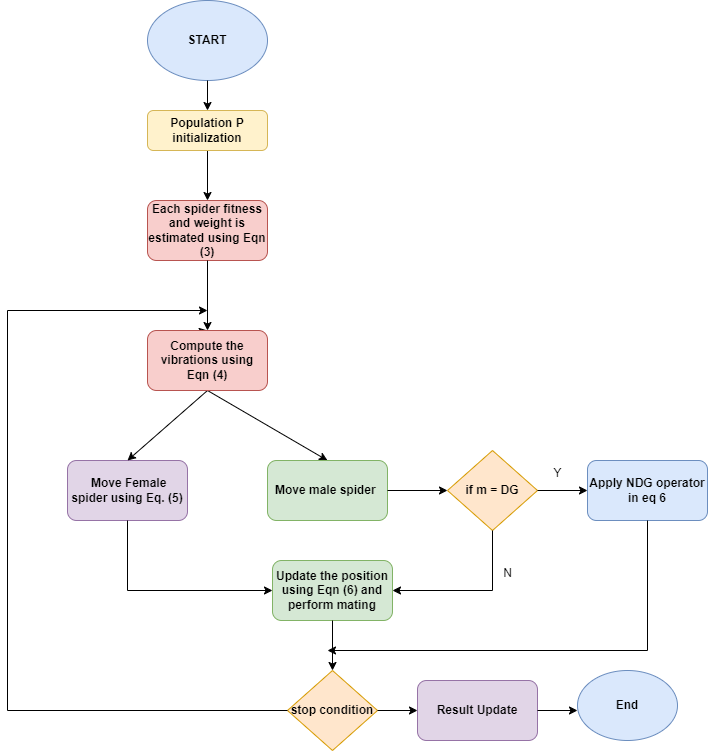

In [50]:

seed= 39
random.seed(seed)
torch.manual_seed(seed)
# Fitness function
def fitness_function(x, recency, frequency, monetary):
    recency_score = torch.tensor(recency) - x[0]
    frequency_score = torch.tensor(frequency) - x[1]
    monetary_score = torch.tensor(monetary) - x[2]

    total_fitness = torch.sum(recency_score ** 2) + torch.sum(frequency_score ** 2) + torch.sum(monetary_score ** 2)
    return total_fitness

# MSSO Algorithm
class MSSO:
    def __init__(self, fitness_function, lower_bound, upper_bound, population_size=None, num_iterations=None, dim=None):
        self.fitness_function = fitness_function
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.population_size = population_size
        self.num_iterations = num_iterations
        self.dim = dim
        self.population = self.initialize_population()
        self.best_spiders = []
        self.best_fitness = float('inf')

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            position = torch.FloatTensor(self.dim).uniform_(self.lower_bound, self.upper_bound)
            population.append(position)
        return population

    def compute_weights(self, fitness_values):
        best_fitness = torch.min(fitness_values)
        worst_fitness = torch.max(fitness_values)
        weights = (fitness_values - worst_fitness) / (best_fitness - worst_fitness)
        return weights

    def compute_vibration(self, weight, distance):
        return weight * torch.exp(-distance ** 2)

    def update_female_position(self, spider, vibrations, alpha, beta, gamma):
        nearest_vibration = vibrations['nearest']
        best_vibration = vibrations['best']
        rand_factor = gamma * (random.random() - 0.5)
        if random.random() < 0.5:
            new_position = spider + alpha * nearest_vibration + beta * best_vibration + rand_factor
        else:
            new_position = spider + alpha * nearest_vibration - beta * best_vibration + rand_factor
        return torch.clamp(new_position, self.lower_bound, self.upper_bound)

    def update_male_position(self, spider, vibrations, alpha, gamma, dominant_group):
        dominant_group_tensor = torch.stack(dominant_group)

        if torch.any(torch.eq(spider, dominant_group_tensor)):
            female_vibration = vibrations['female']
            rand_factor = gamma * (random.random() - 0.5)
            new_position = spider + alpha * female_vibration + rand_factor
        else:
            sum_weights = sum([w for _, w in vibrations['ndg']])
            avg_position = sum([pos * w for pos, w in vibrations['ndg']]) / sum_weights
            new_position = spider + alpha * (avg_position - spider)

        return torch.clamp(new_position, self.lower_bound, self.upper_bound)

    def run(self):
        for iteration in range(self.num_iterations):
            fitness_values = torch.tensor([self.fitness_function(spider, recency_data, frequency_data, monetary_data) for spider in self.population])
            weights = self.compute_weights(fitness_values)

            if torch.min(fitness_values) < self.best_fitness:
                self.best_fitness = torch.min(fitness_values)
                self.best_spiders.append(self.population[torch.argmin(fitness_values)])

            female_group = [spider for i, spider in enumerate(self.population) if i < 0.95 * self.population_size]
            male_group = [spider for i, spider in enumerate(self.population) if i >= 0.95 * self.population_size]
            dominant_group = [spider for i, spider in enumerate(male_group) if i < 0.5 * len(male_group)]
            ndg_group = [(spider, weights[i]) for i, spider in enumerate(male_group) if i >= 0.5 * len(male_group)]

            new_population = []
            for spider in female_group:
                distances = torch.cdist(spider.unsqueeze(0), torch.stack(self.population)).squeeze(0)
                nearest_vibration = self.compute_vibration(weights[torch.argmin(distances)], torch.min(distances))
                best_vibration = self.compute_vibration(weights[torch.argmin(fitness_values)], distances[torch.argmin(fitness_values)])
                vibrations = {'nearest': nearest_vibration, 'best': best_vibration}
                new_position = self.update_female_position(spider, vibrations, alpha=random.random(), beta=random.random(), gamma=random.random())
                new_population.append(new_position)

            for spider in male_group:
                female_vibration = self.compute_vibration(weights[torch.argmin(fitness_values)], distances[torch.argmin(fitness_values)])
                vibrations = {'female': female_vibration, 'ndg': ndg_group}
                new_position = self.update_male_position(spider, vibrations, alpha=random.random(), gamma=random.random(), dominant_group=dominant_group)
                new_population.append(new_position)

            self.population = new_population

        return self.best_spiders

# Parameters
lower_bound = 0
upper_bound = 1
population_size = 100
num_iterations = 3500
dim = 3

# Extract recency, frequency, and monetary data (assuming normalized_rfm_data is available)
recency_data = normalized_rfm_data['recency'].values
frequency_data = normalized_rfm_data['frequency'].values
monetary_data = normalized_rfm_data['monetary'].values

# Initialize and run MSSO, passing the data to the run method
msso = MSSO(fitness_function, lower_bound, upper_bound, population_size, num_iterations, dim)
best_spiders = msso.run()

# Get the count of clusters identified by MSSO
num_clusters = len(best_spiders)

print("Number of best spiders identified by MSSO:", num_clusters)

Number of best spiders identified by MSSO: 4


In [51]:
# Convert each centroid to a PyTorch tensor if they aren't already
best_spiders_tensors = [torch.tensor(centroid, dtype=torch.float32).clone().detach() for centroid in best_spiders]
best_spiders_tensors

<ipython-input-51-4bbae362f822>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  best_spiders_tensors = [torch.tensor(centroid, dtype=torch.float32).clone().detach() for centroid in best_spiders]


[tensor([0.2619, 0.2290, 0.1429]),
 tensor([0.1498, 0.3180, 0.1498]),
 tensor([0.1785, 0.1785, 0.1785]),
 tensor([0.1753, 0.1753, 0.1753])]

## SONN (Self Organizing Neural Network)
Based on our social spiders(best spider) it will cluster our owners based on their engagement level

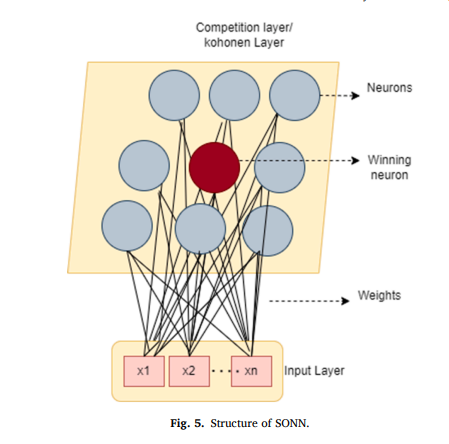

In [52]:

class SONN(nn.Module):
    def __init__(self, input_size, output_size, learning_rate=0.1, max_iter=1000):
        super(SONN, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        # Initialize weights randomly
        self.weights = nn.Parameter(torch.randn(output_size, input_size))

        # Initialize neighborhood size
        self.neighborhood_size = output_size // 2  # initial neighborhood size

    def forward(self, x):
        # Calculate Euclidean distance between input and weights
        dists = torch.cdist(x.unsqueeze(0), self.weights).squeeze(0)
        return dists

    def train_sonn(self, inputs):
        for iteration in range(self.max_iter):
            for x in inputs:
                x = torch.tensor(x, dtype=torch.float32)

                # Step 3: Calculate distance
                dists = self.forward(x)

                # Step 4: Find Best Matching Unit (BMU)
                bmu_idx = torch.argmin(dists).item()

                # Update weights for BMU and its neighbors
                for j in range(self.output_size):
                    if np.abs(j - bmu_idx) <= self.neighborhood_size:
                        self.weights.data[j] += self.learning_rate * (x - self.weights.data[j])

            # Decrease learning rate and neighborhood size over time
            self.learning_rate *= 0.99
            self.neighborhood_size = max(1, int(self.neighborhood_size * 0.99))



# Parameters
input_size = 3  # Number of input nodes (corresponds to MSSO dim)
output_size = num_clusters  # Number of clusters identified by MSSO

# Initialize the SONN
sonn = SONN(input_size, output_size)

# Convert cluster_centroids to a PyTorch tensor
inputs = torch.stack(best_spiders_tensors)

# Train the SONN using the cluster centroids
sonn.train_sonn(inputs)

<ipython-input-52-7f7de286b9bf>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


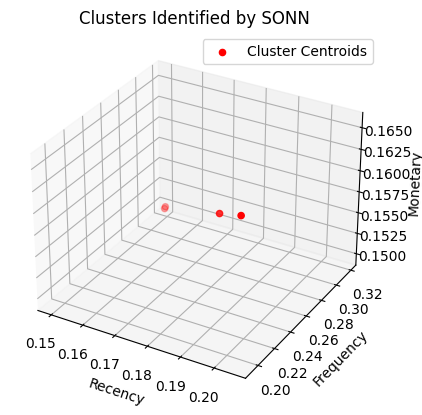

In [53]:
# Assuming 'sonn' is your trained SONN model
weight_vectors = sonn.weights.detach().numpy()  # Convert the trained weights to numpy for visualization

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the weight vectors
ax.scatter(weight_vectors[:, 0], weight_vectors[:, 1], weight_vectors[:, 2], color='red', label='Cluster Centroids')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Clusters Identified by SONN')
ax.legend()

plt.show()

**Analysis**: We are getting 3 clusters from our best spiders using the self organizing map as we can see in the diagram of cluster centroids

Now we have to run our Deep Neural Network for assigning the labels for the classificaion of customer based on the engagement levels

In [55]:
class DNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DNN, self).__init__()
        self.layers = nn.ModuleList()  # Use ModuleList to store layers for indexed access
        in_size = input_size

        # Add hidden layers
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size

        # Add final layer
        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def extract_features(self, x):
        features = []
        for layer in self.layers:
            x = layer(x)
            features.append(x)
        return features

# Initialize the DNN for multi-class classification
feature_columns = ['recency', 'frequency', 'monetary']
input_data = df[feature_columns].values
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(best_spiders)  # Number of clusters identified by MSSO

# Initialize the DNN with the correct output size
dnn = DNN(input_size, [64, 32], n_clusters)

# Training function for the DNN
def train_dnn(dnn, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(dnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = dnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#### Cluster Labels
<div> 0 : High Engagement </div>
<div> 1 : Medium Engagement </div>
<div> 2 : Low Engagement </div>

Epoch 1/100, Loss: 1.2921556234359741
Epoch 11/100, Loss: 0.6112267374992371
Epoch 21/100, Loss: 0.27733755111694336
Epoch 31/100, Loss: 0.15127146244049072
Epoch 41/100, Loss: 0.10295850783586502
Epoch 51/100, Loss: 0.0820741355419159
Epoch 61/100, Loss: 0.05700754374265671
Epoch 71/100, Loss: 0.027834344655275345
Epoch 81/100, Loss: 0.01008047629147768
Epoch 91/100, Loss: 0.00399722158908844


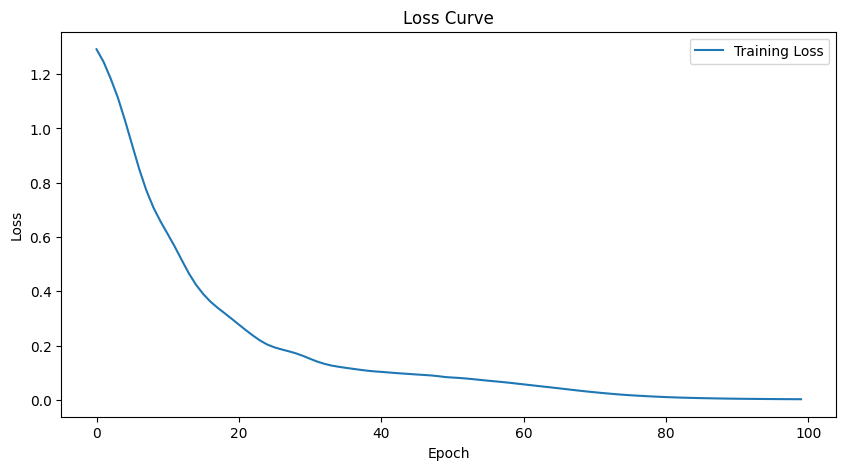

In [56]:
def assign_cluster_labels(input_data, weight_vectors):
    cluster_labels = []
    feature_columns = ['recency', 'frequency', 'monetary']
    input_data = df[feature_columns].values
    for x in input_data:
        x_tensor = torch.tensor(x, dtype=torch.float32)
        dists = torch.cdist(x_tensor.unsqueeze(0), weight_vectors).squeeze(0)
        cluster_label = torch.argmin(dists).item()

        # Map cluster labels to engagement levels
        if cluster_label == 0:
            engagement_level = 2  # Low engagement
        elif cluster_label == 1:
            engagement_level = 1  # Medium engagement
        else:
            engagement_level = 0  # High engagement

        cluster_labels.append(engagement_level)

    return cluster_labels


# Convert input_data to PyTorch tensor
feature_columns = ['recency', 'frequency', 'monetary']
input_data = df[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

# Assign cluster labels using SONN weight vectors
cluster_labels = assign_cluster_labels(input_data, sonn.weights.detach())

# Map cluster labels to integers (0, 1, 2) for classification
cluster_labels = [2 - label for label in cluster_labels]  # Convert 0 -> 2, 1 -> 1, 2 -> 0

# Convert to tensor
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Assuming your DNN model `dnn` and training function `train_dnn` are defined
train_dnn(dnn, input_data_tensor, cluster_labels_tensor)


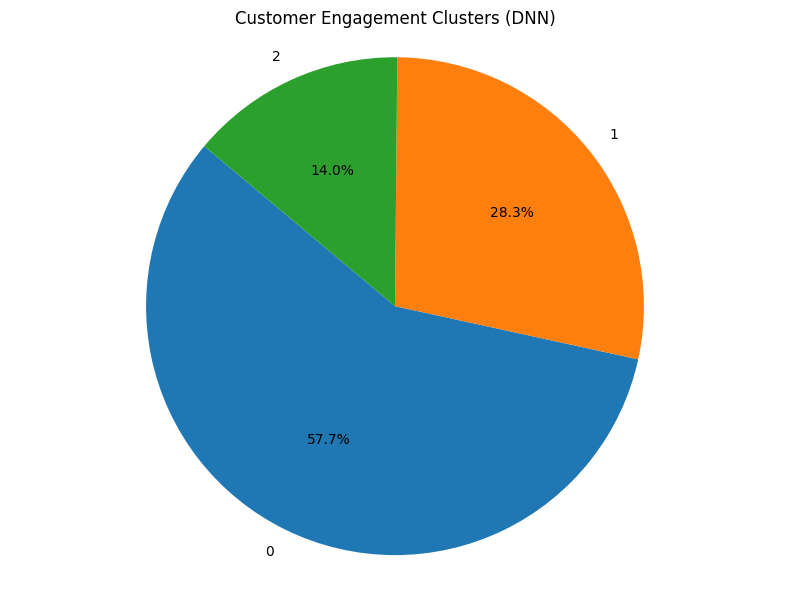

In [57]:
dnn.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = dnn(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
df['DNN_cluster'] = predicted_clusters

# Extract features from the DNN
features = dnn.extract_features(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = df['DNN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (DNN)')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Analysis**: As we can see from our pie chart the distribution of users enagagement level on the social pages of the brands:
<div>Highly Engaged customer : 57.7% </div>
<div> Moderately Engaged Customer : 28.3%</div>
<div> Low Engaged Customer : 14.0 % </div>

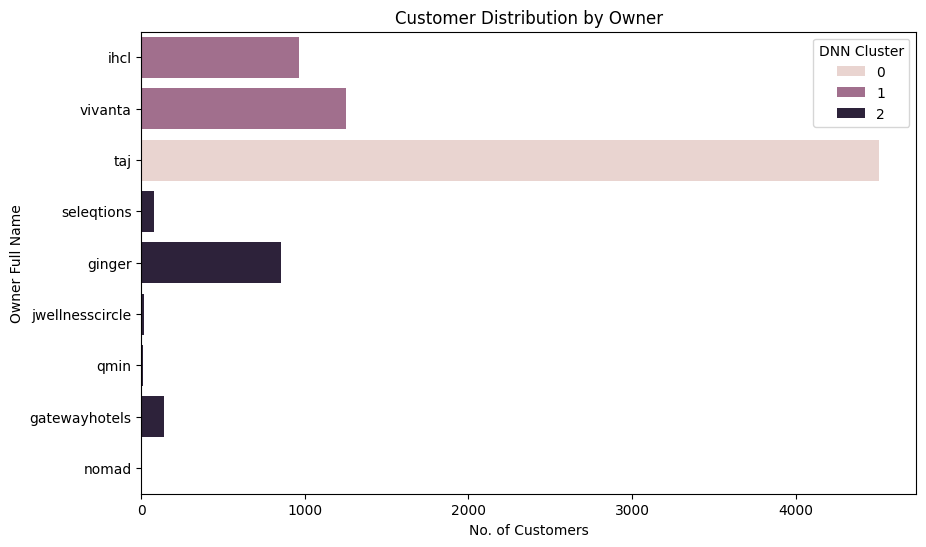

In [59]:
## barplot for each ownerFullName using `DNN_cluster` column
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='DNN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='DNN Cluster')
plt.show()

**Analysis** : This barplot shows how the distribution of engagement level is distributed in the brands

<div> You can clearly see that highest enagagement customers are going for taj hotels and consecutively you can analyse the other hotel enagagement places</div>

In [61]:
# Convert timezone-aware datetimes to timezone-naive datetimes
for col in df.select_dtypes(include=['datetimetz']):  # Use 'datetimetz' to select timezone-aware columns
    df[col] = df[col].dt.tz_localize(None)

# Now try saving to Excel again
df.to_excel('IHCL_customer_segmentation.xlsx', index=False)

# Business Impact :

#### **Customer Segmentation:**
<ol>
 <li>High Engagement: Customers with high engagement are likely to be loyal and valuable. They frequently interact with the brand and contribute significantly to revenue.</li>
 <li>Medium Engagement: These customers are moderately engaged and have the potential to be converted into high-engagement customers with targeted marketing efforts.</li>
 <li>Low Engagement: Customers with low engagement may be at risk of churn. Understanding their behavior can help in devising strategies to re-engage them.</li>
</ol>

#### **Page Visits:**
<ol>
 <li>Popular Pages: Identifying the most visited pages can help in understanding customer interests and preferences. This information can be used to optimize content and improve user experience on these pages.</li>
 <li>Less Visited Pages: Pages with low traffic may need to be reviewed for content relevance, usability, and SEO optimization.</li>
</ol>

#### **Business Suggestions:**
<ol>
<li><strong>Personalized Marketing Campaigns:</strong>Use the segmentation data to create personalized marketing campaigns.
<ul>
<li>For <strong>high-engagement customers:</strong>offer exclusive deals and loyalty rewards.</li>
<li>For<strong> medium-engagement customers:</strong> provide incentives to increase their interaction with the brand.</li>
<li>For <strong>low-engagement customers:</strong> send re-engagement posts with special offers or surveys to understand their needs better.</li>
</ul>
<li><strong>Content Optimization:</strong>
Analyze the content on high-traffic pages to understand what attracts customers. Use this insight to create similar content for other pages. For less visited pages, consider updating the content, improving SEO, and making the navigation more intuitive.</li>
<li><strong>Customer Feedback:</strong>
Collect feedback from different customer segments to understand their needs and preferences. Use this feedback to improve services, products, and overall customer experience.</li>
<li><strong>Loyalty Programs:</strong>
Implement or enhance loyalty programs to reward high-engagement customers. This can include points-based systems, exclusive access to events, or personalized offers.</li>
<li><strong>Targeted Promotions:</strong>
Run targeted promotions based on customer engagement levels. For example, offer discounts on popular pages or products to medium-engagement customers to encourage more frequent interactions.</li>
<li><strong>User Experience Improvements:</strong>
Use the insights from page visits to improve the user experience on the website.Simplify the navigation and make it easier for customers to find what they are looking for.</li>
<li><strong>Cross-Selling and Up-Selling:</strong>
Leverage the engagement data to identify opportunities for cross-selling and up-selling. For example, if a customer frequently visits pages related to luxury stays, promote premium services or packages to them.</li>
<li><strong>Churn Prevention:</strong>
For low-engagement customers, implement churn prevention strategies such as personalized re-engagement campaigns, special offers, and proactive customer service outreach.
By implementing these suggestions, IHCL can enhance customer engagement, improve customer satisfaction, and ultimately drive business growth.</li>





## Different Algorithms
We have tried the dataset on different unsupervised algorithms but that are not so much good as Self organised maps and our modified sso

## Using RFM, Kmeans Clustering and proposed DNN

In [62]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
df

,Unnamed: 0,ownerFullName,commentsCount,likesCount,timestamp
0,0,ihcl,0,1,2023-12-03T09:32:22.000Z
1,1,vivanta,0,28,2023-12-04T07:24:43.000Z
2,2,ihcl,9,86,2023-12-02T20:31:28.000Z
3,3,taj,0,61,2023-12-03T04:01:13.000Z
4,4,taj,0,34,2023-12-03T05:30:16.000Z
...,...,...,...,...,...
7817,7818,taj,0,13,2015-09-16T09:40:09.000Z
7818,7819,taj,3,37,2017-12-30T20:05:20.000Z
7819,7820,taj,6,54,2018-12-29T18:41:52.000Z
7820,7821,taj,2,40,2016-03-16T06:21:20.000Z


In [63]:
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

In [64]:
df.head()

,ownerFullName,commentsCount,likesCount,timestamp
0,ihcl,0,1,2023-12-03T09:32:22.000Z
1,vivanta,0,28,2023-12-04T07:24:43.000Z
2,ihcl,9,86,2023-12-02T20:31:28.000Z
3,taj,0,61,2023-12-03T04:01:13.000Z
4,taj,0,34,2023-12-03T05:30:16.000Z


In [65]:
# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [66]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)


In [67]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_rfm_data['cluster'] = kmeans.fit_predict(normalized_rfm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
# Calculate silhouette score
silhouette_avg = silhouette_score(normalized_rfm_data[['recency', 'frequency', 'monetary']], normalized_rfm_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5352736186591948


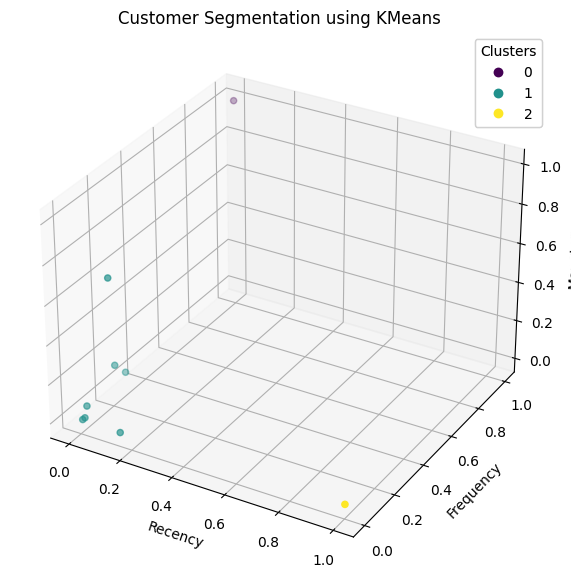

In [69]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using KMeans')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [70]:
# Define the DNN model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DNN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size

        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size

        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def extract_features(self, x):
        features = []
        for layer in self.layers:
            x = layer(x)
            features.append(x)
        return features

# Training function for the DNN
def train_dnn(dnn, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(dnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = dnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/100, Loss: 1.0719411373138428
Epoch 11/100, Loss: 0.6546275615692139
Epoch 21/100, Loss: 0.39350757002830505
Epoch 31/100, Loss: 0.20794203877449036
Epoch 41/100, Loss: 0.05763046070933342
Epoch 51/100, Loss: 0.012065248563885689
Epoch 61/100, Loss: 0.003755991579964757
Epoch 71/100, Loss: 0.0018741409294307232
Epoch 81/100, Loss: 0.0012679108185693622
Epoch 91/100, Loss: 0.000999250914901495


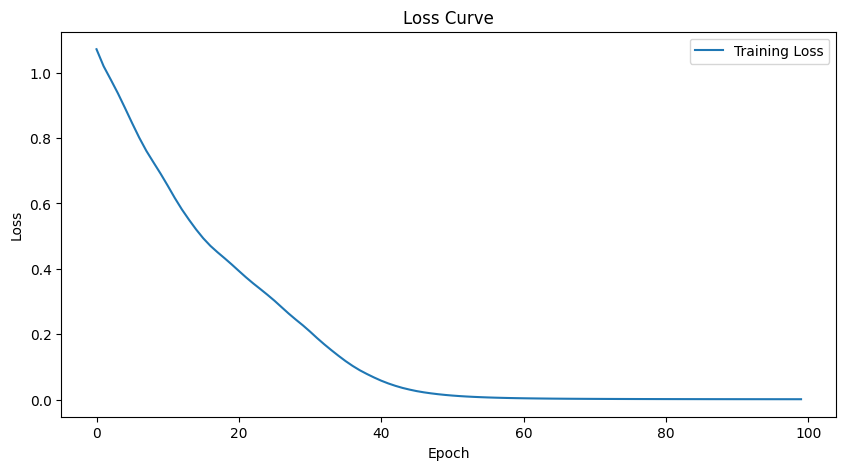

In [71]:
def assign_cluster_labels(input_data, weight_vectors):
    cluster_labels = []
    for x in input_data:
        x_tensor = torch.tensor(x, dtype=torch.float32)
        dists = torch.cdist(x_tensor.unsqueeze(0), weight_vectors).squeeze(0)
        cluster_label = torch.argmin(dists).item()

        # Map cluster labels to engagement levels
        if cluster_label == 0:
            engagement_level = 2  # Low engagement
        elif cluster_label == 1:
            engagement_level = 1  # Medium engagement
        else:
            engagement_level = 0  # High engagement

        cluster_labels.append(engagement_level)

    return cluster_labels

# Convert input_data to PyTorch tensor
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

# Assign cluster labels using SONN weight vectors
cluster_labels = assign_cluster_labels(input_data, sonn.weights.detach())

# Map cluster labels to integers (0, 1, 2) for classification
cluster_labels = [2 - label for label in cluster_labels]  # Convert 0 -> 2, 1 -> 1, 2 -> 0

# Convert to tensor
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the DNN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels))  # Number of clusters identified by SONN
dnn = DNN(input_size, [64, 32], n_clusters)

# Train the DNN
train_dnn(dnn, input_data_tensor, cluster_labels_tensor)


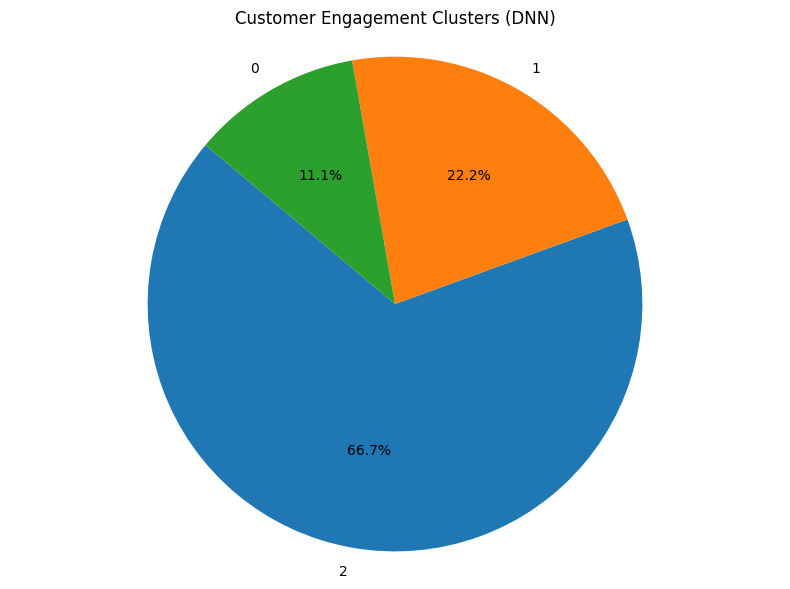

In [72]:

# Evaluate the DNN
dnn.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = dnn(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['DNN_cluster'] = predicted_clusters

# Extract features from the DNN
features = dnn.extract_features(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['DNN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (DNN)')
plt.axis('equal')
plt.tight_layout()
plt.show()

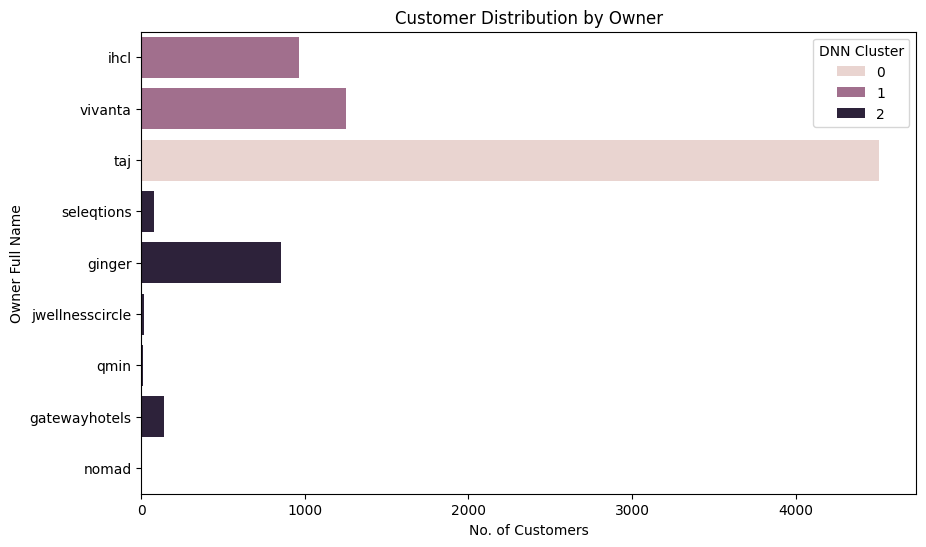

In [73]:
# Bar plot for each ownerFullName using `DNN_cluster` column
df = df.merge(rfm_data[['DNN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='DNN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='DNN Cluster')
plt.show()

In [74]:
# Calculate the accuracy of KMeans clustering
kmeans_labels = normalized_rfm_data['cluster'].values
accuracy = accuracy_score(cluster_labels, kmeans_labels)
print(f'Accuracy of KMeans clustering: {accuracy}')

Accuracy of KMeans clustering: 0.4444444444444444


The accuracy is not so high

## using DBSCAN clustering / density based clustering Algorithm

In [75]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
df

,Unnamed: 0,ownerFullName,commentsCount,likesCount,timestamp
0,0,ihcl,0,1,2023-12-03T09:32:22.000Z
1,1,vivanta,0,28,2023-12-04T07:24:43.000Z
2,2,ihcl,9,86,2023-12-02T20:31:28.000Z
3,3,taj,0,61,2023-12-03T04:01:13.000Z
4,4,taj,0,34,2023-12-03T05:30:16.000Z
...,...,...,...,...,...
7817,7818,taj,0,13,2015-09-16T09:40:09.000Z
7818,7819,taj,3,37,2017-12-30T20:05:20.000Z
7819,7820,taj,6,54,2018-12-29T18:41:52.000Z
7820,7821,taj,2,40,2016-03-16T06:21:20.000Z


In [76]:
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [77]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)

In [78]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
normalized_rfm_data['cluster'] = dbscan.fit_predict(normalized_rfm_data)

In [79]:
# Calculate silhouette score (only if there are more than one cluster)
if len(set(normalized_rfm_data['cluster'])) > 1:
    silhouette_avg = silhouette_score(normalized_rfm_data[['recency', 'frequency', 'monetary']], normalized_rfm_data['cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print('Silhouette Score: Not applicable (only one cluster)')

Silhouette Score: 0.4945021294134047


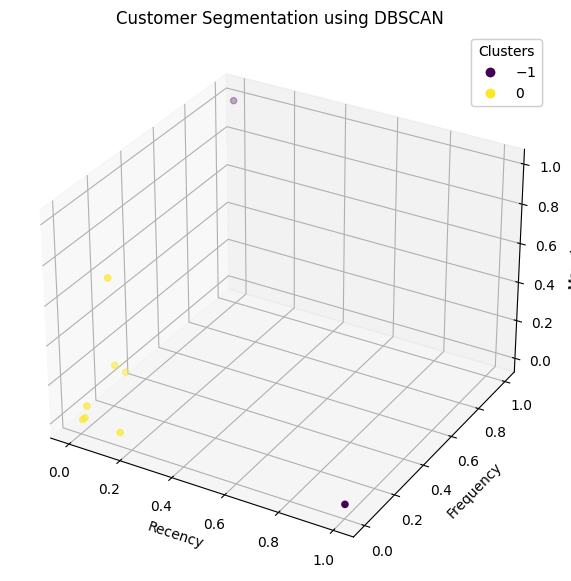

In [80]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using DBSCAN')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [81]:
# Define the DNN model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DNN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size

        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size

        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def extract_features(self, x):
        features = []
        for layer in self.layers:
            x = layer(x)
            features.append(x)
        return features

# Training function for the DNN
def train_dnn(dnn, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(dnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = dnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/100, Loss: 1.0783778429031372
Epoch 11/100, Loss: 0.5619179606437683
Epoch 21/100, Loss: 0.3088946044445038
Epoch 31/100, Loss: 0.1237403154373169
Epoch 41/100, Loss: 0.02923782356083393
Epoch 51/100, Loss: 0.007739424705505371
Epoch 61/100, Loss: 0.0032638353295624256
Epoch 71/100, Loss: 0.001973950071260333
Epoch 81/100, Loss: 0.0014363330556079745
Epoch 91/100, Loss: 0.0011574989184737206


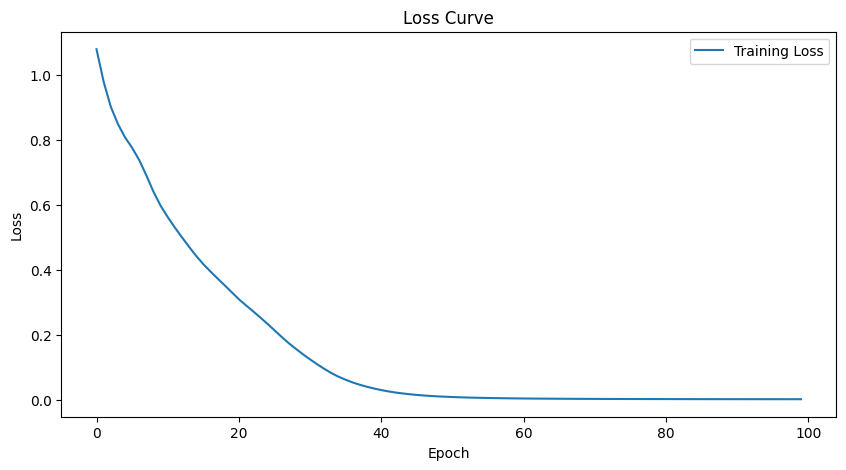

In [82]:
def assign_cluster_labels(input_data, weight_vectors):
    cluster_labels = []
    for x in input_data:
        x_tensor = torch.tensor(x, dtype=torch.float32)
        dists = torch.cdist(x_tensor.unsqueeze(0), weight_vectors).squeeze(0)
        cluster_label = torch.argmin(dists).item()

        # Map cluster labels to engagement levels
        if cluster_label == 0:
            engagement_level = 2  # Low engagement
        elif cluster_label == 1:
            engagement_level = 1  # Medium engagement
        else:
            engagement_level = 0  # High engagement

        cluster_labels.append(engagement_level)

    return cluster_labels

# Convert input_data to PyTorch tensor
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

# Assign cluster labels using SONN weight vectors
cluster_labels = assign_cluster_labels(input_data, sonn.weights.detach())

# Map cluster labels to integers (0, 1, 2) for classification
cluster_labels = [2 - label for label in cluster_labels]  # Convert 0 -> 2, 1 -> 1, 2 -> 0

# Convert to tensor
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the DNN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels))  # Number of clusters identified by SONN
dnn = DNN(input_size, [64, 32], n_clusters)

# Train the DNN
train_dnn(dnn, input_data_tensor, cluster_labels_tensor)


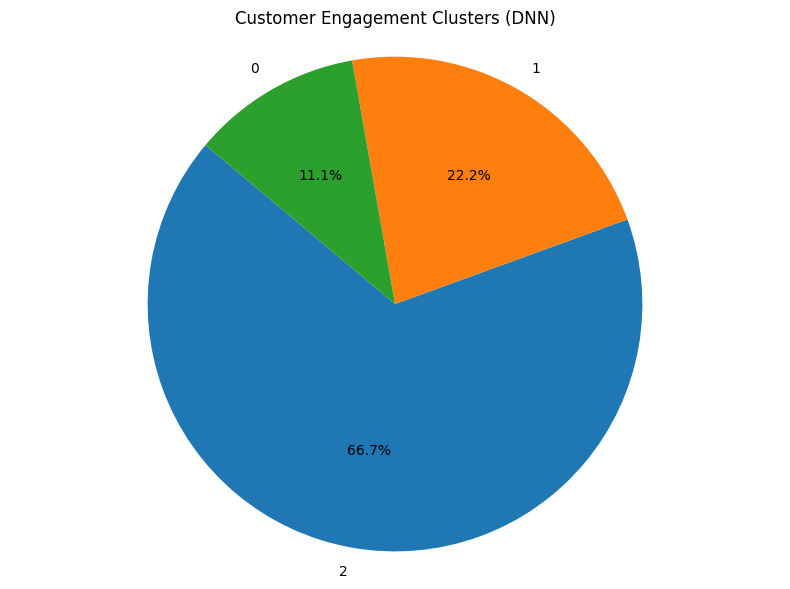

In [83]:
# Evaluate the DNN
dnn.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = dnn(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['DNN_cluster'] = predicted_clusters

# Extract features from the DNN
features = dnn.extract_features(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['DNN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (DNN)')
plt.axis('equal')
plt.tight_layout()
plt.show()


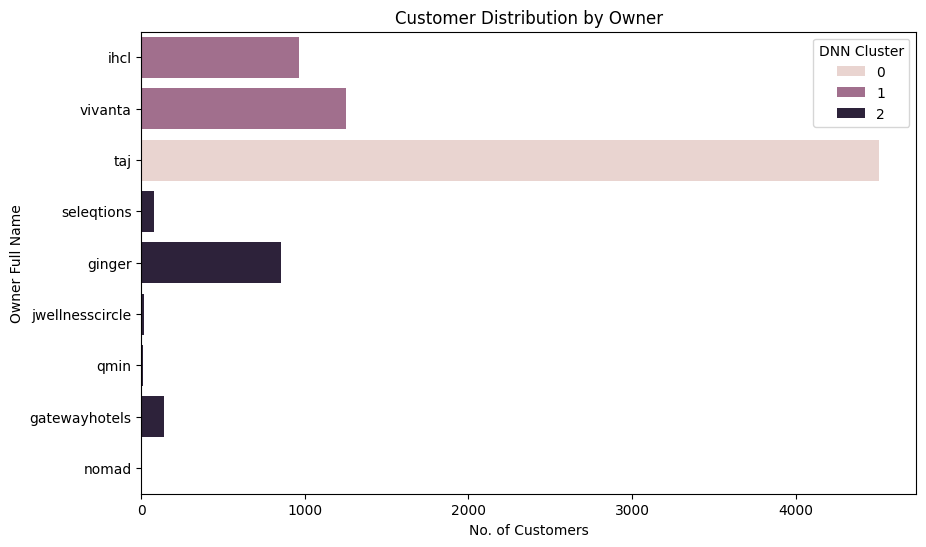

In [84]:
# Bar plot for each ownerFullName using `DNN_cluster` column
df = df.merge(rfm_data[['DNN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='DNN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='DNN Cluster')
plt.show()


same as kmeans for using DNN

## KMeans + ANN

In [85]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [86]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)


In [87]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_rfm_data['cluster'] = kmeans.fit_predict(normalized_rfm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_rfm_data['cluster'] = kmeans.fit_predict(normalized_rfm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


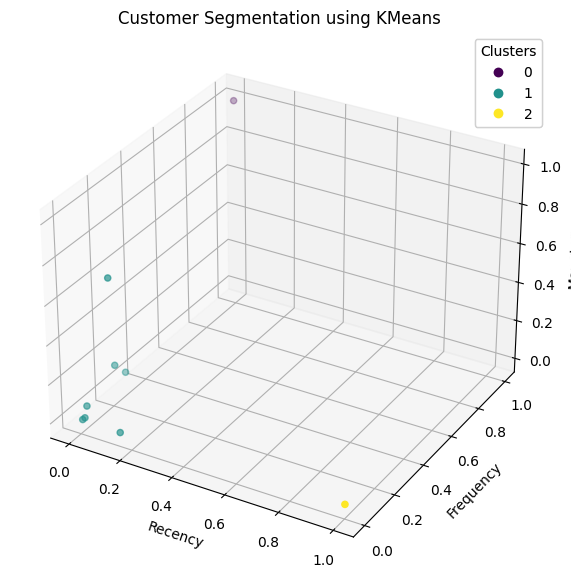

In [89]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using KMeans')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


Epoch 1/100, Loss: 1.2466371059417725
Epoch 11/100, Loss: 0.37076258659362793
Epoch 21/100, Loss: 0.03191004693508148
Epoch 31/100, Loss: 0.002520824782550335
Epoch 41/100, Loss: 0.0003957023727707565
Epoch 51/100, Loss: 0.00021641326020471752
Epoch 61/100, Loss: 0.0001460131461499259
Epoch 71/100, Loss: 0.0001097163840313442
Epoch 81/100, Loss: 9.165811206912622e-05
Epoch 91/100, Loss: 8.188653009710833e-05


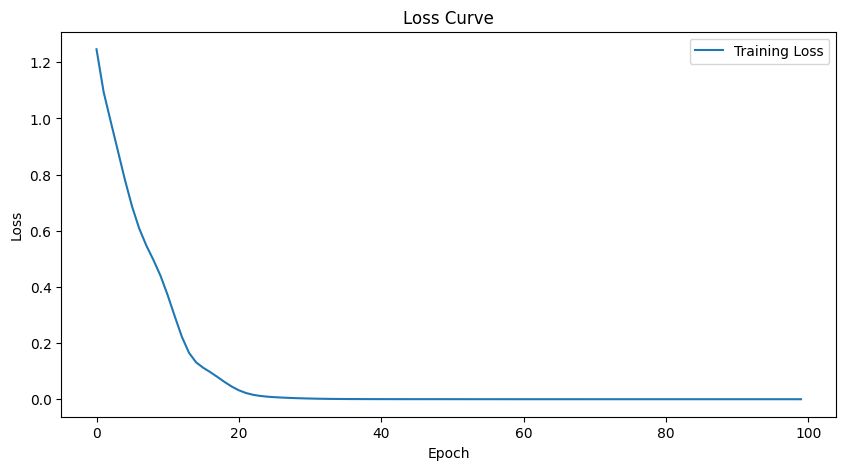

In [90]:
# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ANN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size

        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size

        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def extract_features(self, x):
        features = []
        for layer in self.layers:
            x = layer(x)
            features.append(x)
        return features

# Training function for the ANN
def train_ann(ann, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(ann.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ann(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Convert input_data to PyTorch tensor
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

# Use KMeans cluster labels as targets for ANN
cluster_labels = normalized_rfm_data['cluster'].values
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the ANN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels))  # Number of clusters identified by KMeans
ann = ANN(input_size, [64, 32], n_clusters)

# Train the ANN
train_ann(ann, input_data_tensor, cluster_labels_tensor)

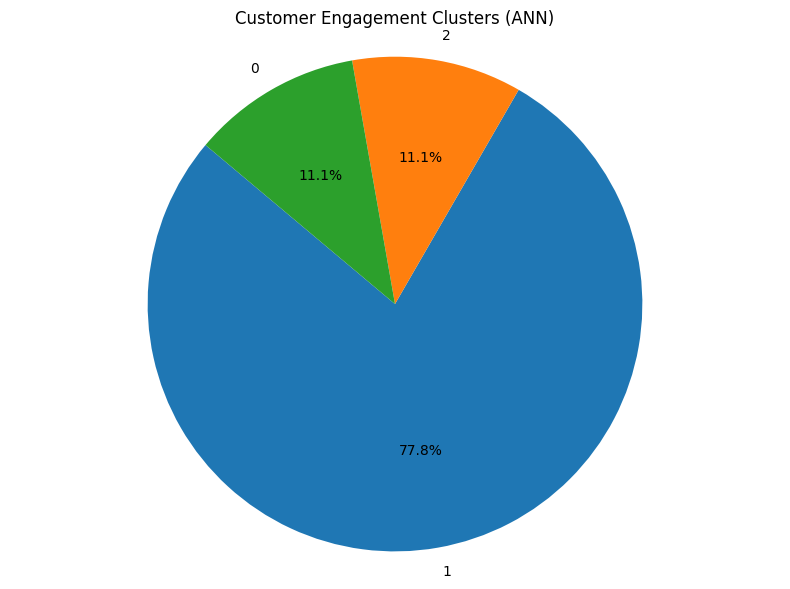

In [91]:
# Evaluate the ANN
ann.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = ann(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['ANN_cluster'] = predicted_clusters

# Extract features from the ANN
features = ann.extract_features(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['ANN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (ANN)')
plt.axis('equal')
plt.tight_layout()
plt.show()


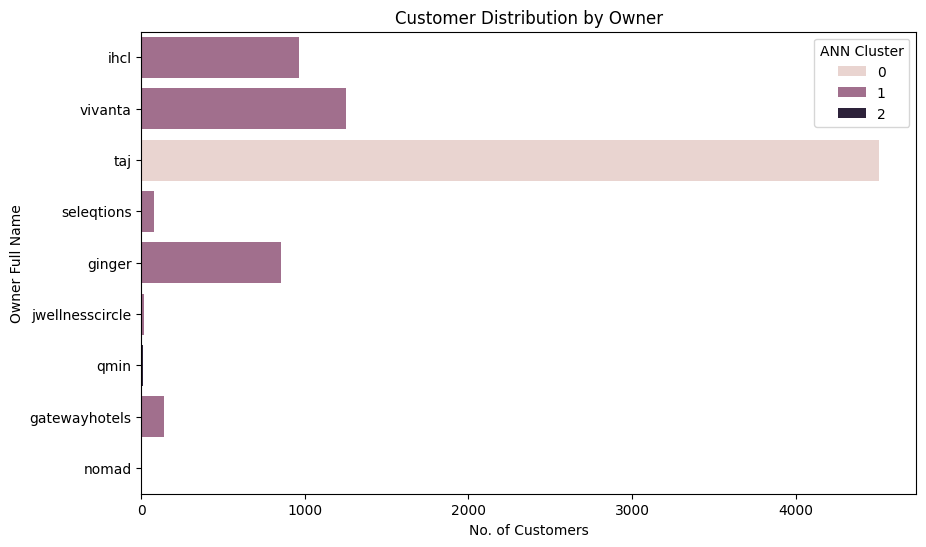

In [92]:
# Bar plot for each ownerFullName using `ANN_cluster` column
df = df.merge(rfm_data[['ANN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='ANN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='ANN Cluster')
plt.show()


In [93]:
# Calculate the accuracy of the ANN
accuracy = accuracy_score(cluster_labels, predicted_clusters)
print(f'Accuracy of ANN clustering: {accuracy}')

Accuracy of ANN clustering: 1.0


The model is getting overfitted due to the type of data. This methodology may turns to great loss for business

#  Kmeans + CNN

In [94]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [95]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)


In [96]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_rfm_data['cluster'] = kmeans.fit_predict(normalized_rfm_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(normalized_rfm_data[['recency', 'frequency', 'monetary']], normalized_rfm_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5352736186591948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


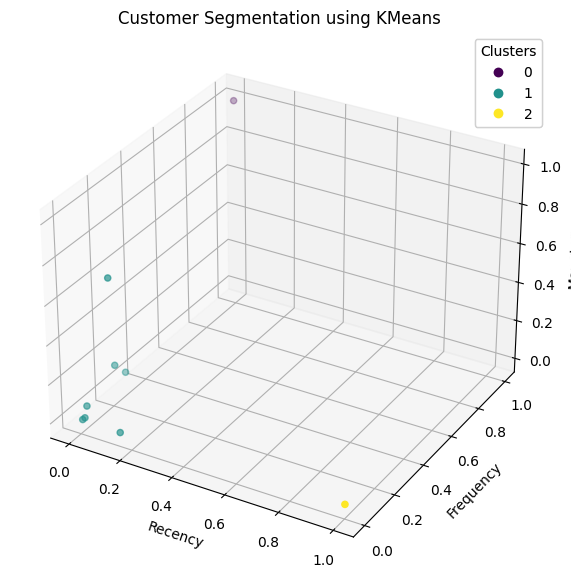

In [97]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using KMeans')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Epoch 1/100, Loss: 1.038415551185608
Epoch 11/100, Loss: 0.27257072925567627
Epoch 21/100, Loss: 0.003319363109767437
Epoch 31/100, Loss: 5.8475732657825574e-05
Epoch 41/100, Loss: 9.046560080605559e-06
Epoch 51/100, Loss: 4.1060743569687475e-06
Epoch 61/100, Loss: 2.9139923753973562e-06
Epoch 71/100, Loss: 2.5431215817661723e-06
Epoch 81/100, Loss: 2.370931724726688e-06
Epoch 91/100, Loss: 2.2649685433862032e-06


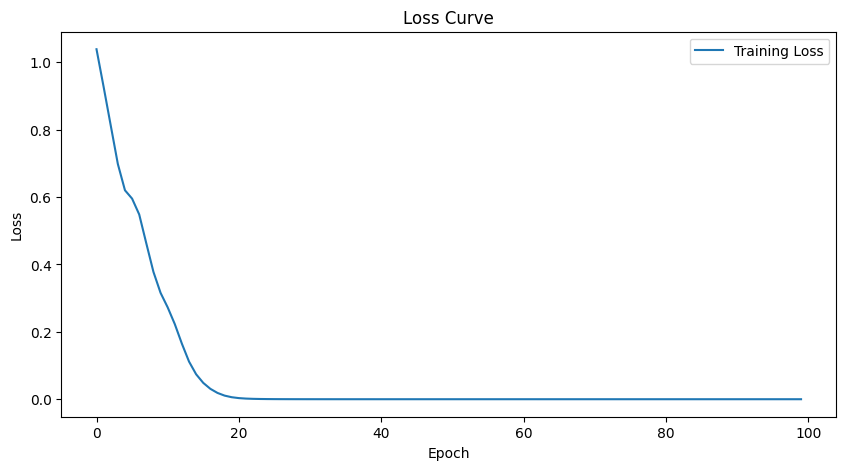

In [98]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=1, stride=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1, stride=1)
        self.fc1 = nn.Linear(32 * input_size, 64)  # Adjust the input size for the fully connected layer
        self.fc2 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=1, stride=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function for the CNN
def train_cnn(cnn, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Convert input_data to PyTorch tensor and reshape for CNN
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(1)

# Use KMeans cluster labels as targets for CNN
cluster_labels = normalized_rfm_data['cluster'].values
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the CNN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels))  # Number of clusters identified by KMeans
cnn = CNN(input_size, n_clusters)

# Train the CNN
train_cnn(cnn, input_data_tensor, cluster_labels_tensor)

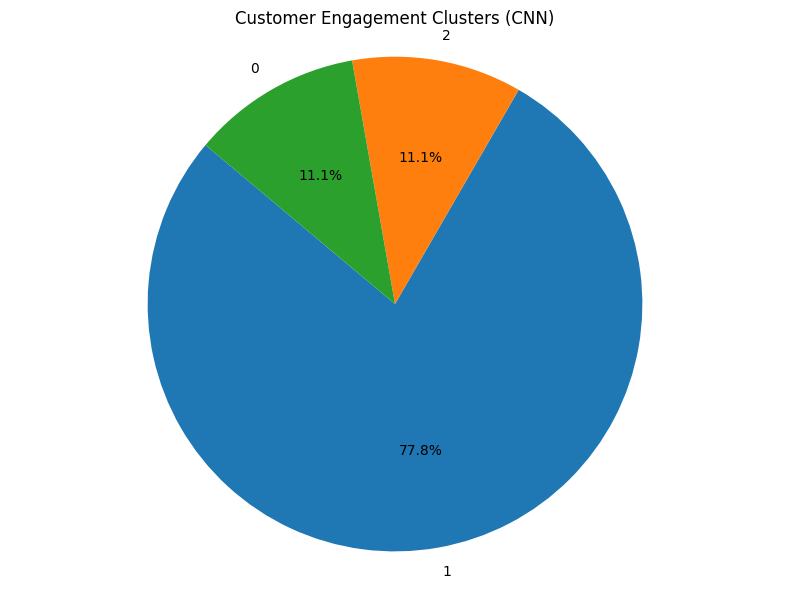

In [99]:
# Evaluate the CNN
cnn.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = cnn(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['CNN_cluster'] = predicted_clusters

# Extract features from the CNN
features = cnn(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['CNN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (CNN)')
plt.axis('equal')
plt.tight_layout()
plt.show()

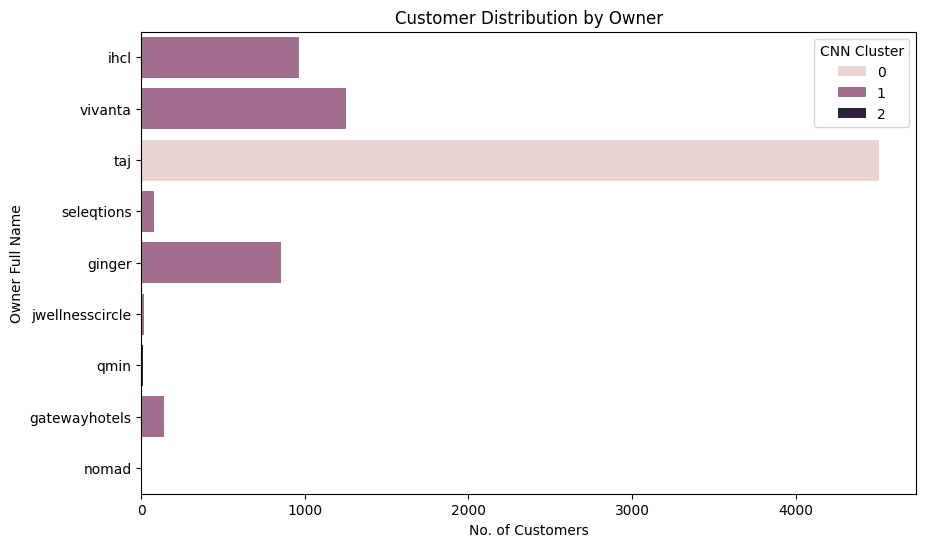

In [100]:
# Bar plot for each ownerFullName using `CNN_cluster` column
df = df.merge(rfm_data[['CNN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='CNN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='CNN Cluster')
plt.show()


In [101]:
# Calculate the accuracy of the CNN
accuracy = accuracy_score(cluster_labels, predicted_clusters)
print(f'Accuracy of CNN clustering: {accuracy}')

Accuracy of CNN clustering: 1.0


This is also getting overfitted .CNN is not taking good care of the classification taks as compared to the DNN

## DBSCAN + CNN

In [107]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [108]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)

In [109]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
normalized_rfm_data['cluster'] = dbscan.fit_predict(normalized_rfm_data)

In [110]:
# Calculate silhouette score
if len(set(normalized_rfm_data['cluster'])) > 1:
    silhouette_avg = silhouette_score(normalized_rfm_data[['recency', 'frequency', 'monetary']], normalized_rfm_data['cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print('Silhouette Score: Not applicable (only one cluster found)')

Silhouette Score: 0.4945021294134047


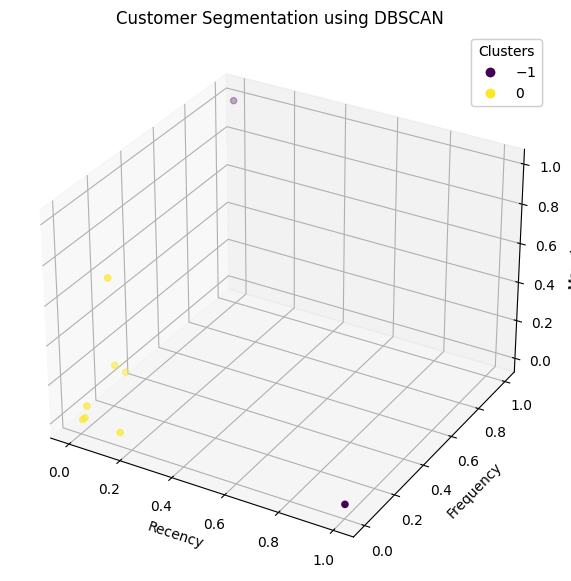

In [111]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using DBSCAN')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Epoch 1/100, Loss: 0.6281003952026367
Epoch 11/100, Loss: 1.7881377516459906e-06
Epoch 21/100, Loss: 0.0
Epoch 31/100, Loss: 0.0
Epoch 41/100, Loss: 0.0
Epoch 51/100, Loss: 0.0
Epoch 61/100, Loss: 0.0
Epoch 71/100, Loss: 0.0
Epoch 81/100, Loss: 0.0
Epoch 91/100, Loss: 0.0


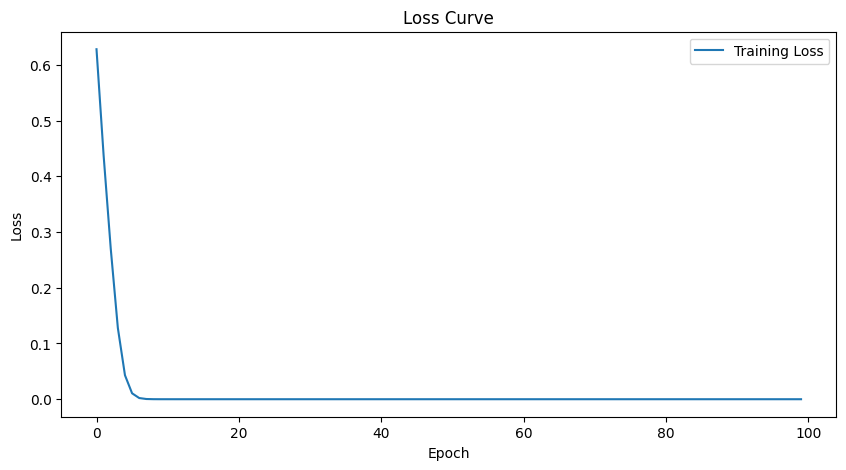

In [112]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=1, stride=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1, stride=1)
        self.fc1 = nn.Linear(32 * input_size, 64)  # Adjust the input size for the fully connected layer
        self.fc2 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=1, stride=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function for the CNN
def train_cnn(cnn, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)  # Ignore the -1 labels
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Convert input_data to PyTorch tensor and reshape for CNN
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(1)

# Use DBSCAN cluster labels as targets for CNN
cluster_labels = normalized_rfm_data['cluster'].values
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the CNN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels))  # Number of clusters identified by DBSCAN
cnn = CNN(input_size, n_clusters)

# Train the CNN
train_cnn(cnn, input_data_tensor, cluster_labels_tensor)

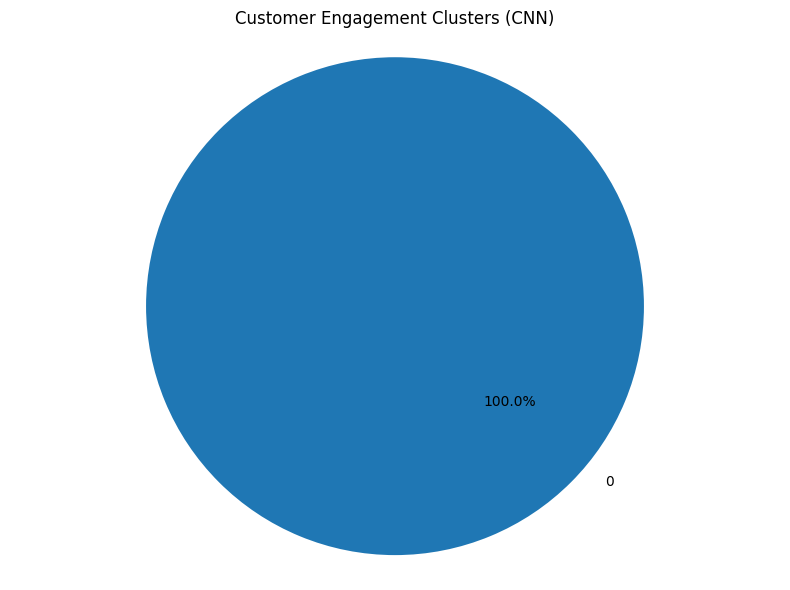

In [113]:
# Evaluate the CNN
cnn.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = cnn(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['CNN_cluster'] = predicted_clusters

# Extract features from the CNN
features = cnn(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['CNN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (CNN)')
plt.axis('equal')
plt.tight_layout()
plt.show()


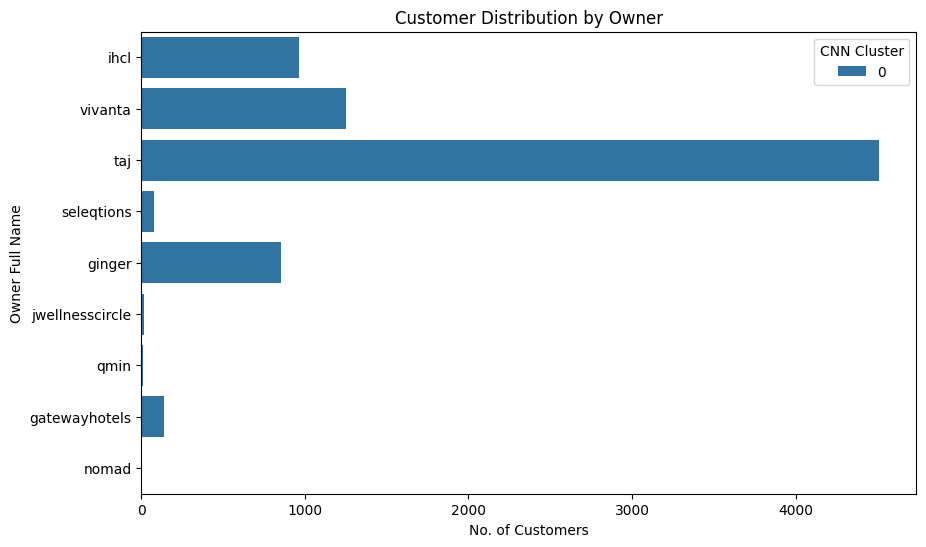

In [114]:
# Bar plot for each ownerFullName using `CNN_cluster` column
df = df.merge(rfm_data[['CNN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='CNN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='CNN Cluster')
plt.show()

In [115]:
# Calculate the accuracy of the CNN
accuracy = accuracy_score(cluster_labels, predicted_clusters)
print(f'Accuracy of CNN clustering: {accuracy}')

Accuracy of CNN clustering: 0.7777777777777778


this combination is not good

## DBSCAN + ANN

In [102]:
df=pd.read_csv('IHCL_brand_segmentation.xlsx')
## drop the unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [103]:
# RFM Analysis
def rfm_analysis(df, customer_id_col, recency_col, frequency_col, monetary_col):
    max_date = df[recency_col].max()
    rfm = df.groupby(customer_id_col).agg({
        recency_col: lambda x: (max_date - x.max()).days,
        frequency_col: 'count',
        monetary_col: 'sum'
    }).rename(columns={
        recency_col: 'recency',
        frequency_col: 'frequency',
        monetary_col: 'monetary'
    })
    return rfm

rfm_data = rfm_analysis(df, 'ownerFullName', 'timestamp', 'commentsCount', 'likesCount')

# Normalize the RFM data
scaler = MinMaxScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)
normalized_rfm_data = pd.DataFrame(scaled_rfm_data, columns=rfm_data.columns)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
normalized_rfm_data['cluster'] = dbscan.fit_predict(normalized_rfm_data)

In [104]:
# Calculate silhouette score
if len(set(normalized_rfm_data['cluster'])) > 1:
    silhouette_avg = silhouette_score(normalized_rfm_data[['recency', 'frequency', 'monetary']], normalized_rfm_data['cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print('Silhouette Score: Not applicable (only one cluster found)')

Silhouette Score: 0.4945021294134047


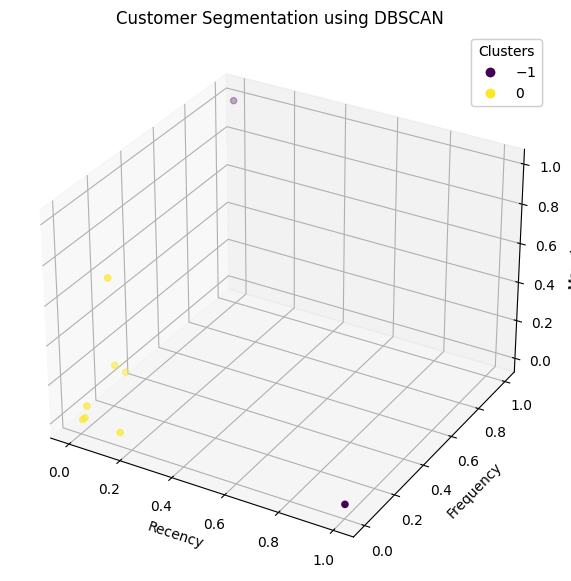

In [105]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normalized_rfm_data['recency'], normalized_rfm_data['frequency'], normalized_rfm_data['monetary'], c=normalized_rfm_data['cluster'], cmap='viridis')

# Add labels
ax.set_title('Customer Segmentation using DBSCAN')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


Epoch 1/100, Loss: 0.0
Epoch 11/100, Loss: 0.0
Epoch 21/100, Loss: 0.0
Epoch 31/100, Loss: 0.0
Epoch 41/100, Loss: 0.0
Epoch 51/100, Loss: 0.0
Epoch 61/100, Loss: 0.0
Epoch 71/100, Loss: 0.0
Epoch 81/100, Loss: 0.0
Epoch 91/100, Loss: 0.0


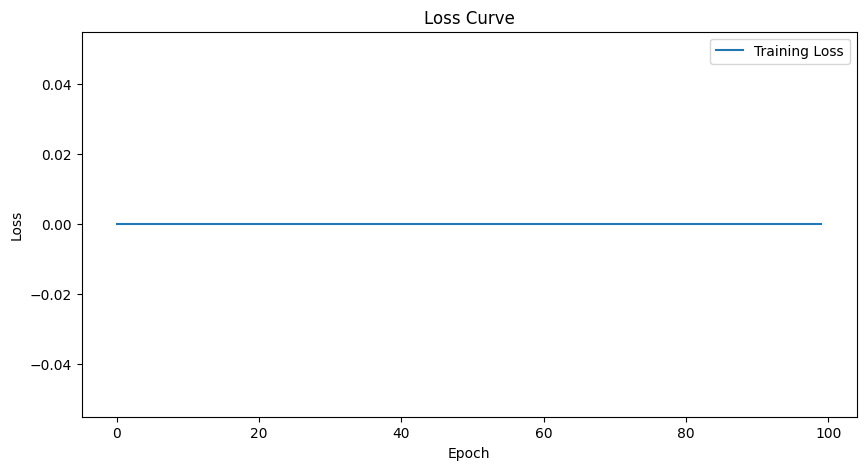

In [116]:
# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ANN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size

        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size

        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Training function for the ANN
def train_ann(ann, inputs, targets, epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(ann.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ann(inputs)
        # Filter out noise points (-1 labels) from targets
        valid_indices = targets != -1
        valid_outputs = outputs[valid_indices]
        valid_targets = targets[valid_indices]

        if valid_targets.size(0) == 0:  # Handle the case where all points are noise
            print("All points are noise in this batch. Skipping training for this epoch.")
            continue

        loss = criterion(valid_outputs, valid_targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    # Plotting the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Convert input_data to PyTorch tensor
feature_columns = ['recency', 'frequency', 'monetary']
input_data = normalized_rfm_data[feature_columns].values
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

# Use DBSCAN cluster labels as targets for ANN
cluster_labels = normalized_rfm_data['cluster'].values
cluster_labels_tensor = torch.tensor(cluster_labels, dtype=torch.long)

# Initialize the ANN with the correct output size
input_size = input_data.shape[1]  # Number of input features
n_clusters = len(set(cluster_labels)) - 1  # Subtract 1 to exclude the noise cluster (-1)
ann = ANN(input_size, [64, 32], n_clusters)

# Train the ANN
train_ann(ann, input_data_tensor, cluster_labels_tensor)

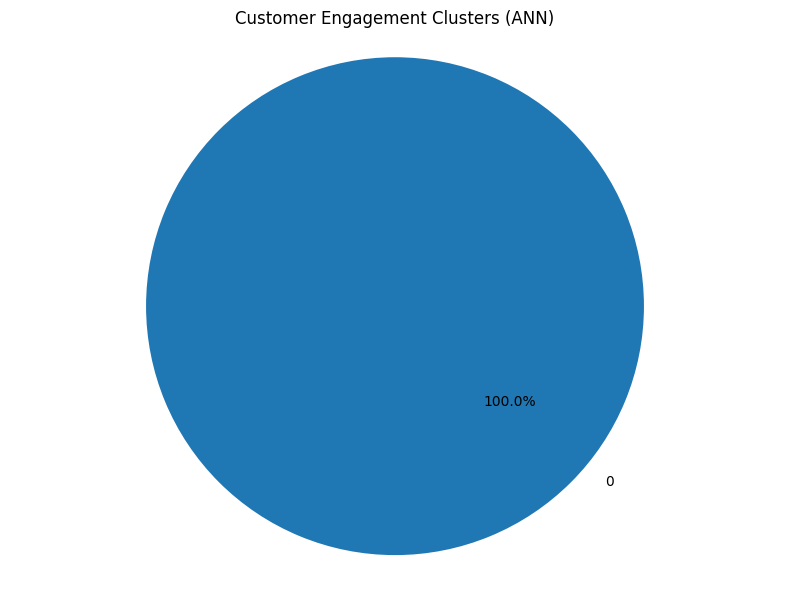

In [117]:
# Evaluate the ANN
ann.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = ann(input_data_tensor)

predicted_clusters = torch.argmax(predictions, dim=1).numpy()

# Store the predicted clusters in the original DataFrame
rfm_data['ANN_cluster'] = predicted_clusters

# Extract features from the ANN
features = ann(input_data_tensor)

# Visualize the cluster distribution using a pie chart
cluster_counts = rfm_data['ANN_cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Engagement Clusters (ANN)')
plt.axis('equal')
plt.tight_layout()
plt.show()


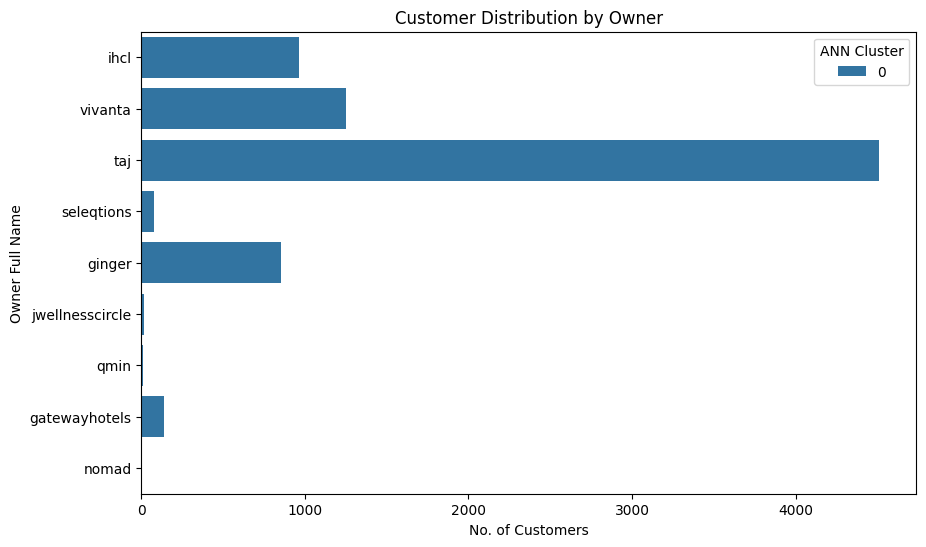

Accuracy of ANN clustering: 0.7777777777777778


In [118]:
# Bar plot for each ownerFullName using `ANN_cluster` column
df = df.merge(rfm_data[['ANN_cluster']], left_on='ownerFullName', right_index=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='ownerFullName', hue='ANN_cluster', data=df)
plt.title('Customer Distribution by Owner')
plt.xlabel('No. of Customers')
plt.ylabel('Owner Full Name')
plt.legend(title='ANN Cluster')
plt.show()

# Calculate the accuracy of the ANN
accuracy = accuracy_score(cluster_labels, predicted_clusters)
print(f'Accuracy of ANN clustering: {accuracy}')

this is also bad combination